In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from utils.methods import *
warnings.filterwarnings('ignore')

In [2]:
prev = pd.read_csv('../../Dataset/dseb63_final_project_DP_dataset/dseb63_previous_application.csv')
prev.head(5)

,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,SK_ID_CURR
0,2030495,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,...,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,293189
1,1696966,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,...,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,293189
2,2154916,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,...,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,293189
3,2802425,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,...,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,91587
4,1536272,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,...,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,91587


In [3]:
prev.shape

(1413701, 37)

In [4]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1413701 non-null  int64  
 1   NAME_CONTRACT_TYPE           1413701 non-null  object 
 2   AMT_ANNUITY                  1106483 non-null  float64
 3   AMT_APPLICATION              1413701 non-null  float64
 4   AMT_CREDIT                   1413700 non-null  float64
 5   AMT_DOWN_PAYMENT             664161 non-null   float64
 6   AMT_GOODS_PRICE              1094176 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1413701 non-null  object 
 8   HOUR_APPR_PROCESS_START      1413701 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1413701 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1413701 non-null  int64  
 11  RATE_DOWN_PAYMENT            664161 non-null   float64
 12  RATE_INTEREST_PRIMARY        4791 non-null

In [5]:
prev.dtypes.value_counts()

object     16
float64    15
int64       6
Name: count, dtype: int64

In [6]:
prev.duplicated().sum()

0

Check null percentage of previous application

In [7]:
def check_missing_values(df):
    # Missing value percentage 
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Null Percentage"]
    return df_null_percentage



null_df = check_missing_values(prev)
null_df

,Feature,Null Percentage
0,RATE_INTEREST_PRIMARY,99.661102
1,RATE_INTEREST_PRIVILEGED,99.661102
2,AMT_DOWN_PAYMENT,53.019698
3,RATE_DOWN_PAYMENT,53.019698
4,NAME_TYPE_SUITE,49.138538
5,DAYS_FIRST_DRAWING,39.690571
6,DAYS_FIRST_DUE,39.690571
7,DAYS_LAST_DUE_1ST_VERSION,39.690571
8,DAYS_LAST_DUE,39.690571
9,DAYS_TERMINATION,39.690571


<Axes: xlabel='Null Percentage', ylabel='Feature'>

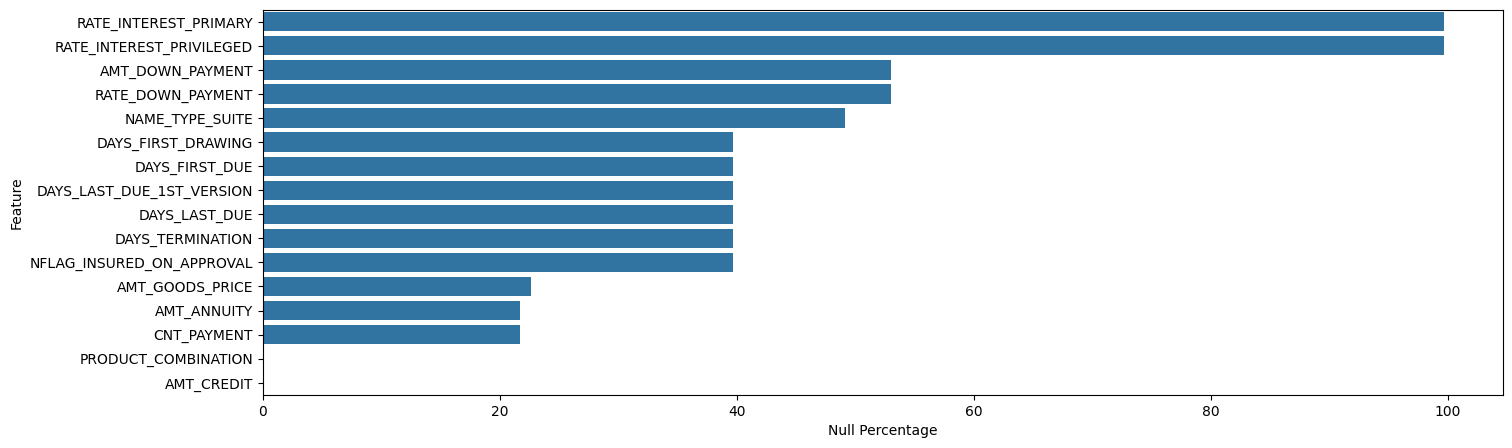

In [8]:
plt.figure(figsize=(16, 5))
sns.barplot(x=null_df["Null Percentage"], y=null_df["Feature"])

- The table 'previous_application' has 16 out of 37 columns containing null values.

- Columns 'RATE_INTEREST_PRIMARY' and 'RATE_INTEREST_PRIVILEGED' contain up to 99% missing values, so we can drop these two features.

- Additionally, for 'PRODUCT_COMBINATION' and 'AMT_CREDIT', the percentage of missing values is very small, so we can drop the rows with null values for these two columns.

In [9]:
stat_analysis = StatisticAnalysis(prev)

SK_ID_PREV                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     307218
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                749540
AMT_GOODS_PRICE                 319525
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               749540
RATE_INTEREST_PRIMARY          1408910
RATE_INTEREST_PRIVILEGED       1408910
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 694672
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
SELLERPLACE_AREA         

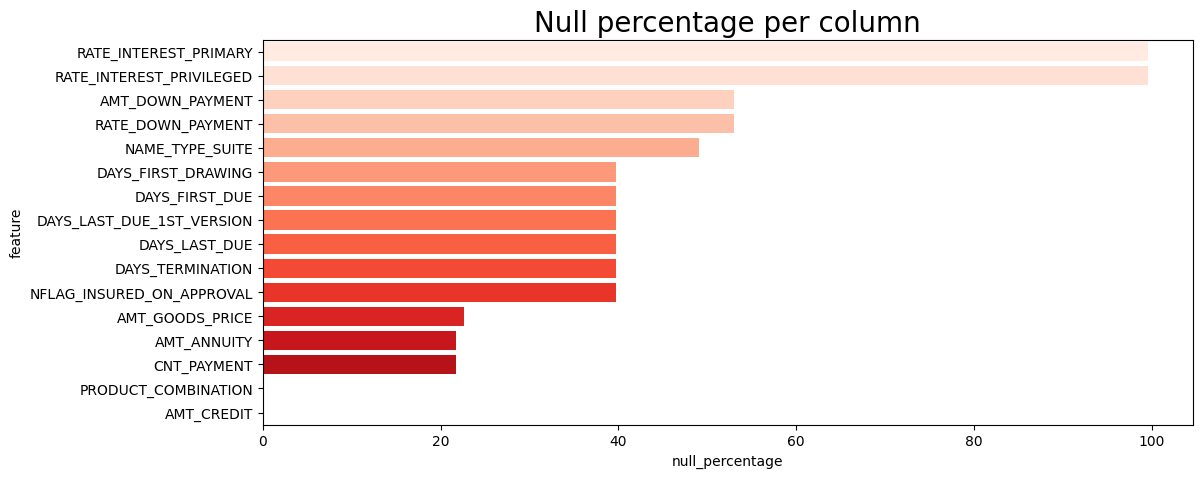

In [10]:
stat_analysis.check_null()

- Can drop RATE_INTEREST_PRIMARY, RATE_INTEREST_PRIVILEGED since 99% data is null

- Row contains null of PRODUCT_COMBINATION and AMT_CREDIT can be dropped too since null percentage is low

In [11]:
prev.drop(columns=['RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'], inplace=True)

In [12]:
prev['AMT_CREDIT'].fillna(0, inplace=True)
prev['PRODUCT_COMBINATION'].fillna(prev['PRODUCT_COMBINATION'].mode()[0], inplace=True)

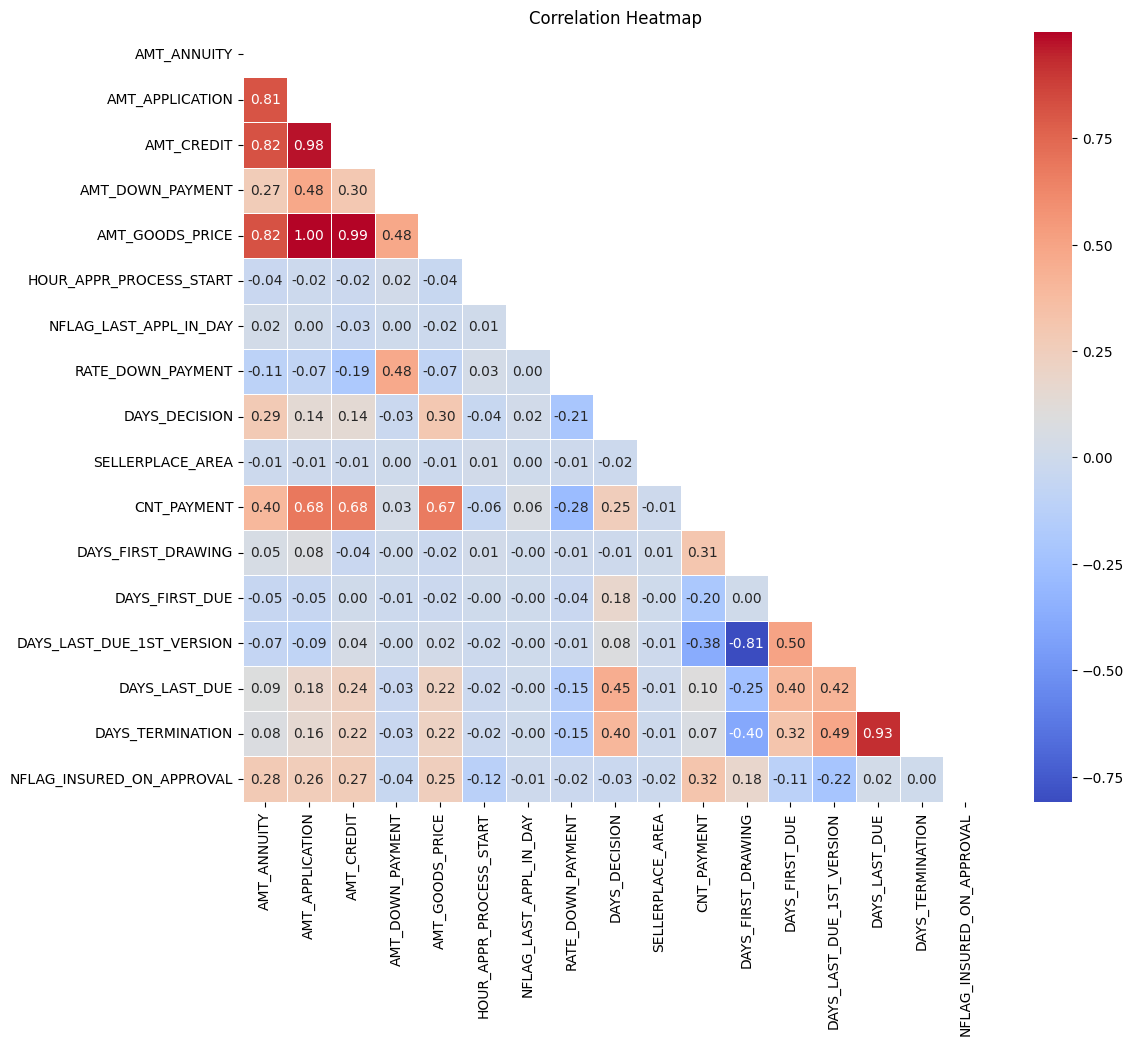

In [13]:
stat_analysis.correlation(drop_cols=['SK_ID_PREV', 'SK_ID_CURR'])

- AMT_APPLICATION, AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE are highly correlated
- DAY_DETERMINATION vs DAY_LAST_DUE are highly correlated
- DAY_LAST_DUE_1ST_VERSION vs DAY_FIRST_DRAWING are highly correlated

These feature may be excluded when training to avoid collinearity, inefficiency and unneccessary cost

**Univariate analysis**

NAME_CONTRACT_TYPE

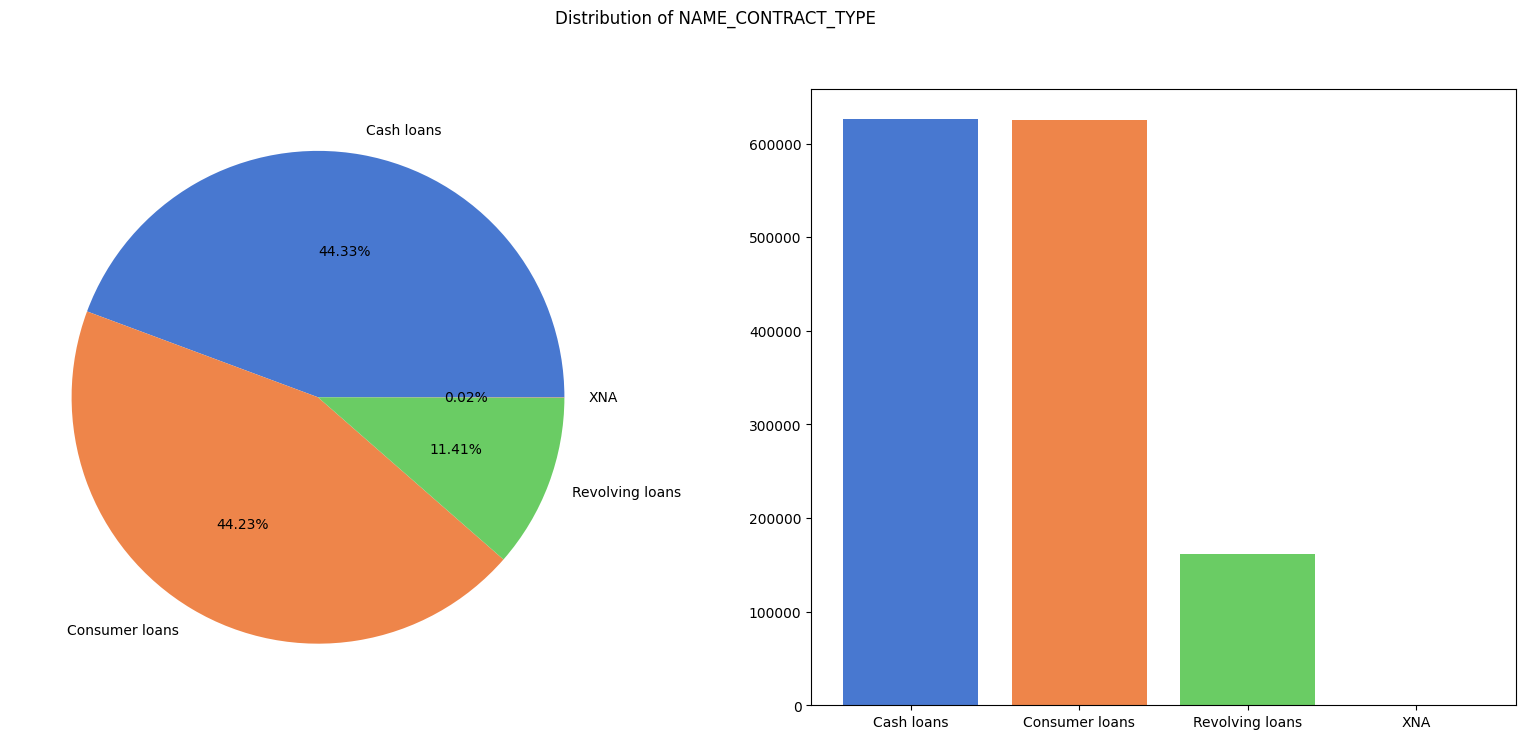

In [14]:
contract = UnivariateAnalysis(prev)
contract.visualize(x='NAME_CONTRACT_TYPE')

WEEKDAY_APPR_PROCESS_START

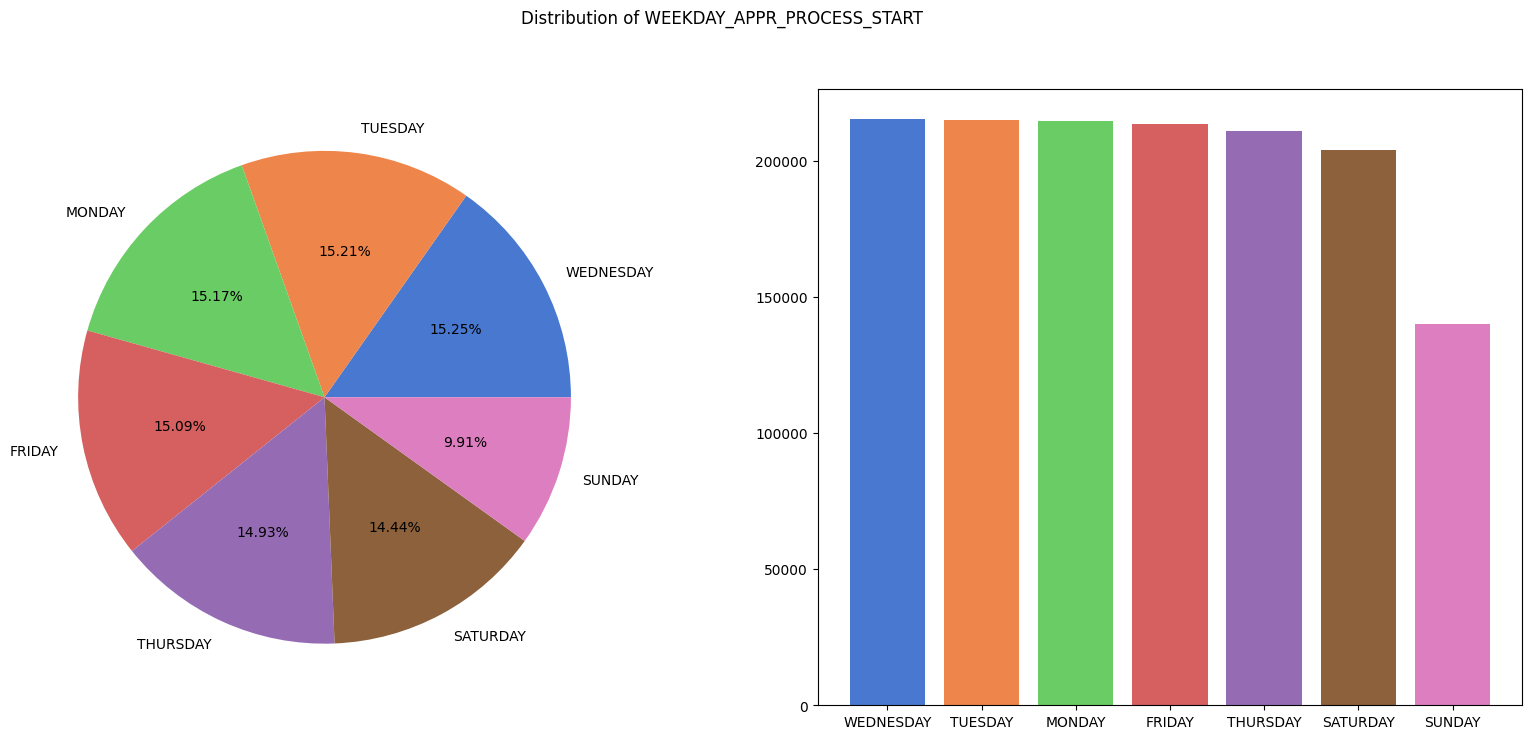

In [15]:
day_apply = UnivariateAnalysis(prev)
day_apply.visualize(x='WEEKDAY_APPR_PROCESS_START')

The number of customer apply on weekday is quite simliar, while the figure for Sunday is significant lower

NAME_CASH_LOAN_PURPOSE: Purpose for cash loan in previous application

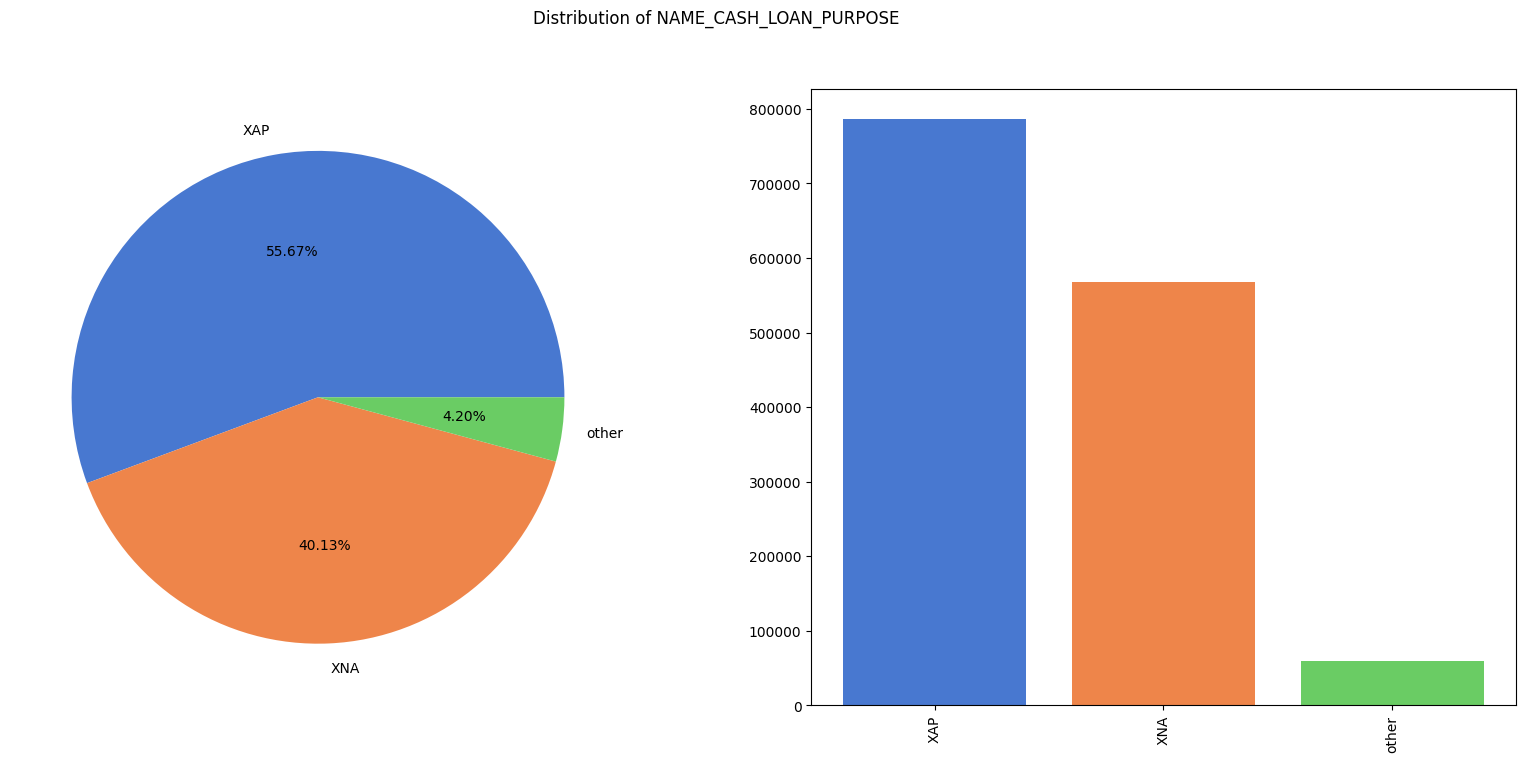

In [16]:
# loan_purpose = UnivariateAnalysis(prev['NAME_CASH_LOAN_PURPOSE'])
# loan_purpose.visualize(rotate=90)
loan_purpose = UnivariateAnalysis(prev)
loan_purpose.visualize(x='NAME_CASH_LOAN_PURPOSE', rotate=90, create_other=True)

- The purpose for most of the Loan Applications is XAP, which is followed by XNA. However, the definition of these terms is not provided in the columns_description.csv.
- This may mean that the loan application purpose was not shared by the applicant, though we cannot be sure.

NAME_CONTRACT_STATUS: Contract was approved or not in previous application

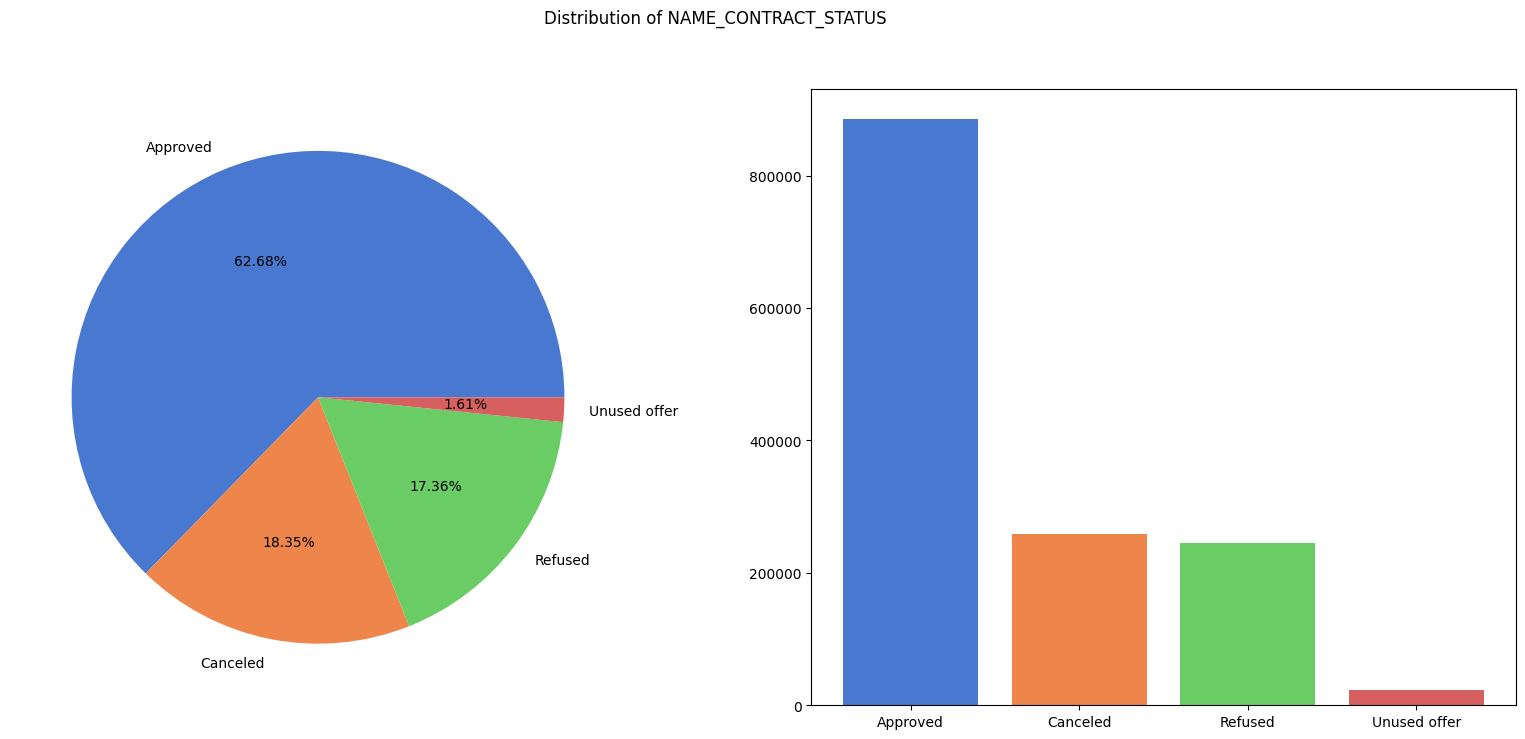

In [17]:
contract_stat = UnivariateAnalysis(prev)
contract_stat.visualize(x='NAME_CONTRACT_STATUS')

- Most of the previous applications for the clients were approved.
- This is followed by applications that were cancelled and refused.
- There were very few applications that were approved but the loans were unused by the applicant.

NAME_PAYMENT_TYPE: Payment method that client choose to pay for the previous application

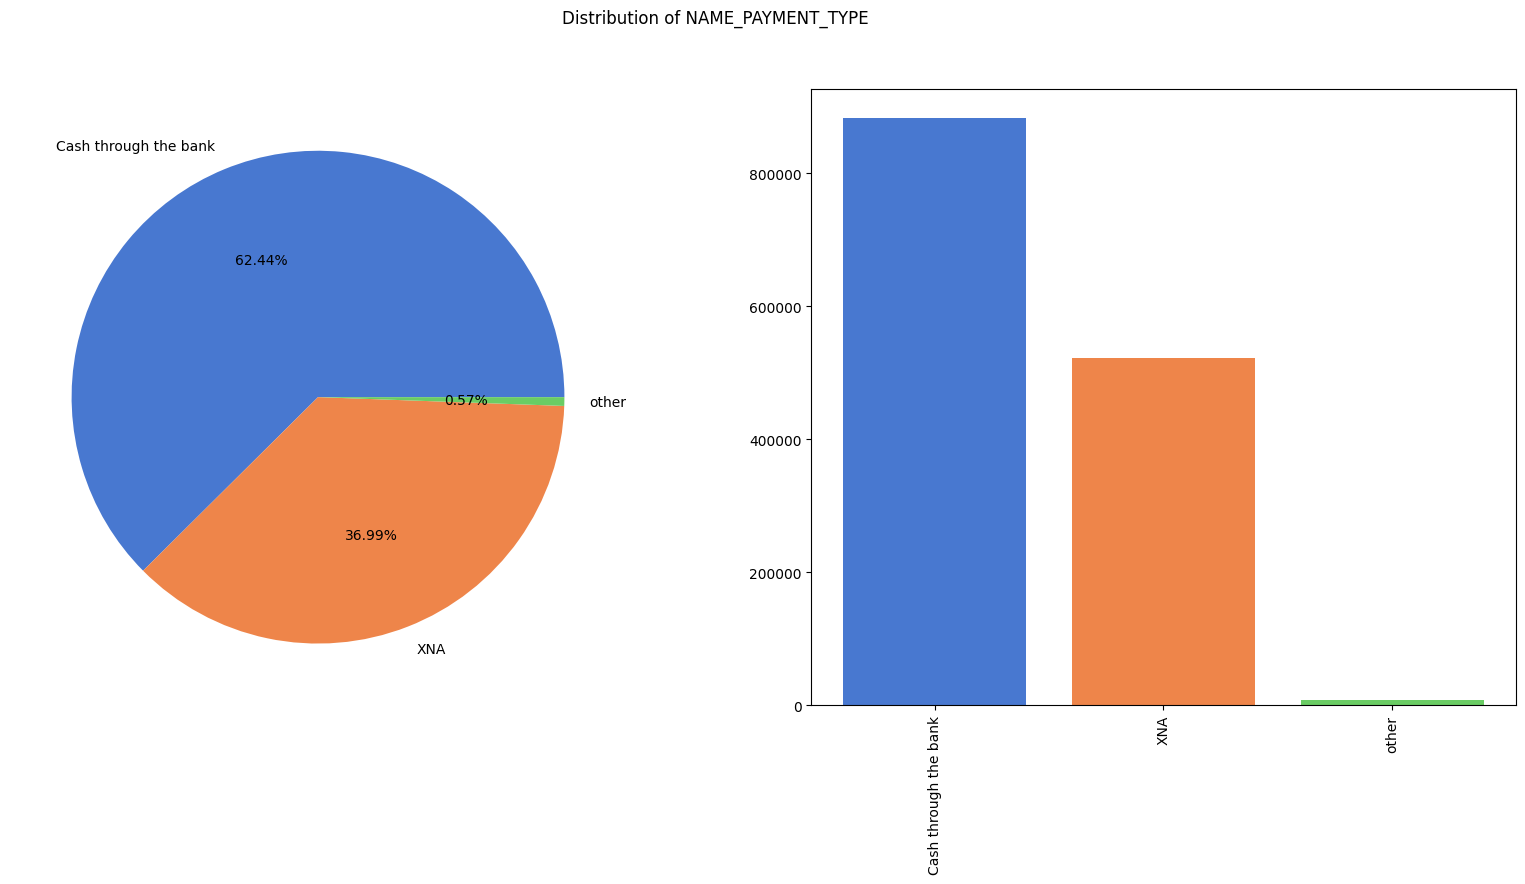

In [18]:
pay_med = UnivariateAnalysis(prev)
pay_med.visualize(x='NAME_PAYMENT_TYPE', rotate=90, create_other=True)

- The Payment Type basically refers to the Payment Method that the client chose to pay for the previous application, and as we can see here, most of the clients chose to pay via Cash through the Bank for the same.
- This is followed by people whose payment type is XNA.

CODE_REJECT_REASON: Why the previous application rejected?

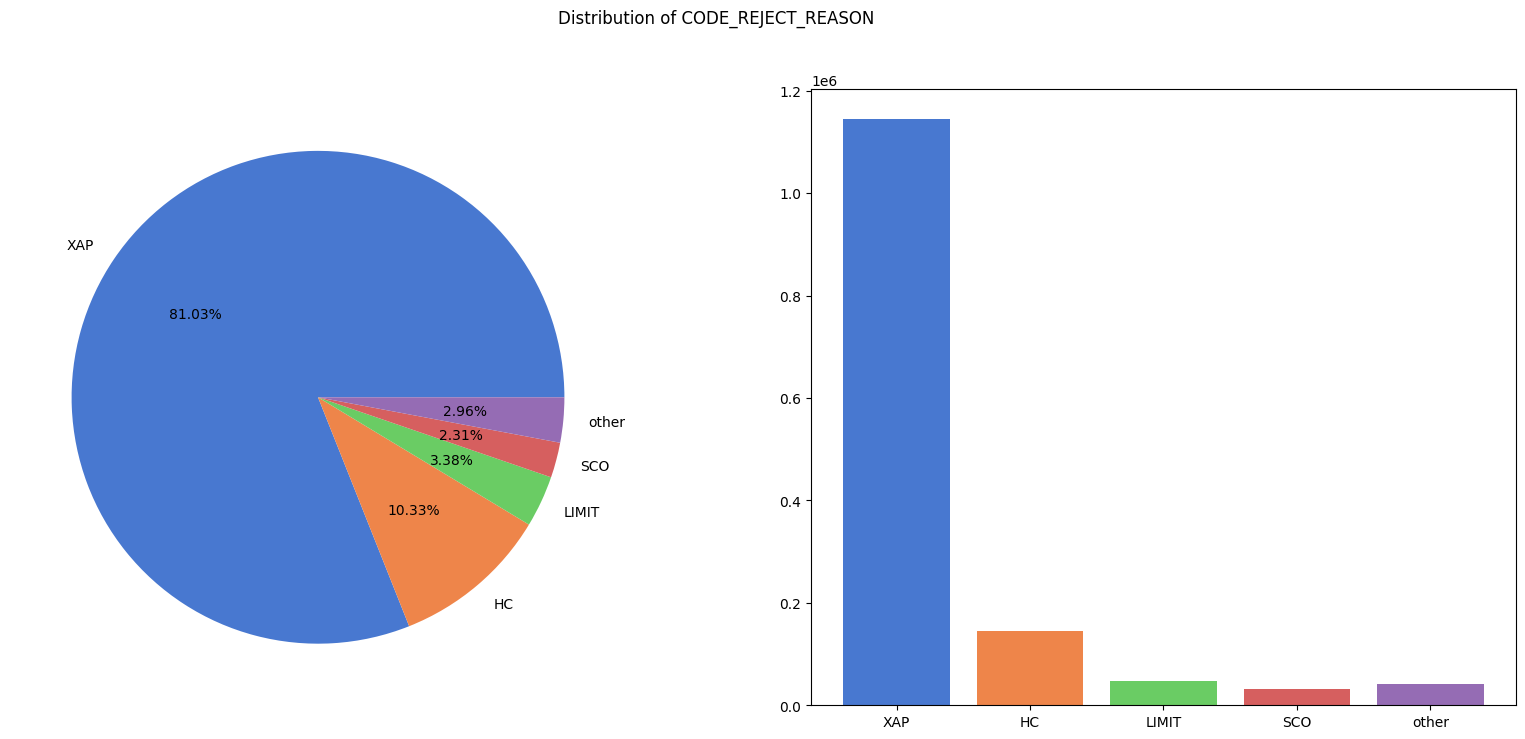

In [19]:
prev_rejected = UnivariateAnalysis(prev)
prev_rejected.visualize(x='CODE_REJECT_REASON', create_other=True)

- Code_Reject_Reason basically refers to the reason why the previous loan application of the client was rejected by the bank. As can be seen from here, in most of the cases XAP, was the reason provided. (Not Applicable)
- This is followed by HC as the second most prominent reason.

NAME_TYPE_SUITE: Who accompanied client when applying for the previous application

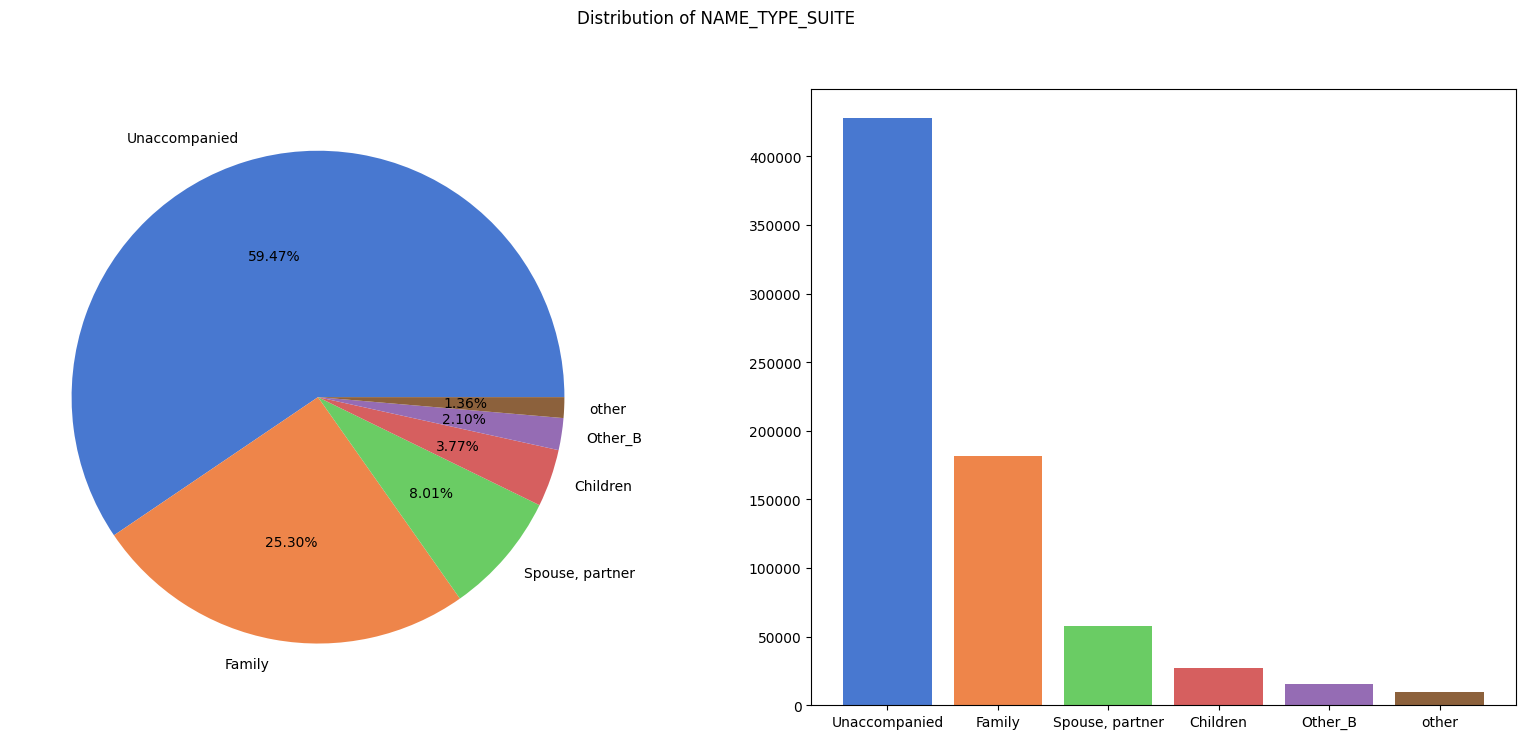

In [20]:
acc = UnivariateAnalysis(prev)
acc.visualize(x='NAME_TYPE_SUITE', create_other=True)

NAME_CLIENT_TYPE: Was the client old or new client when applying for previous application

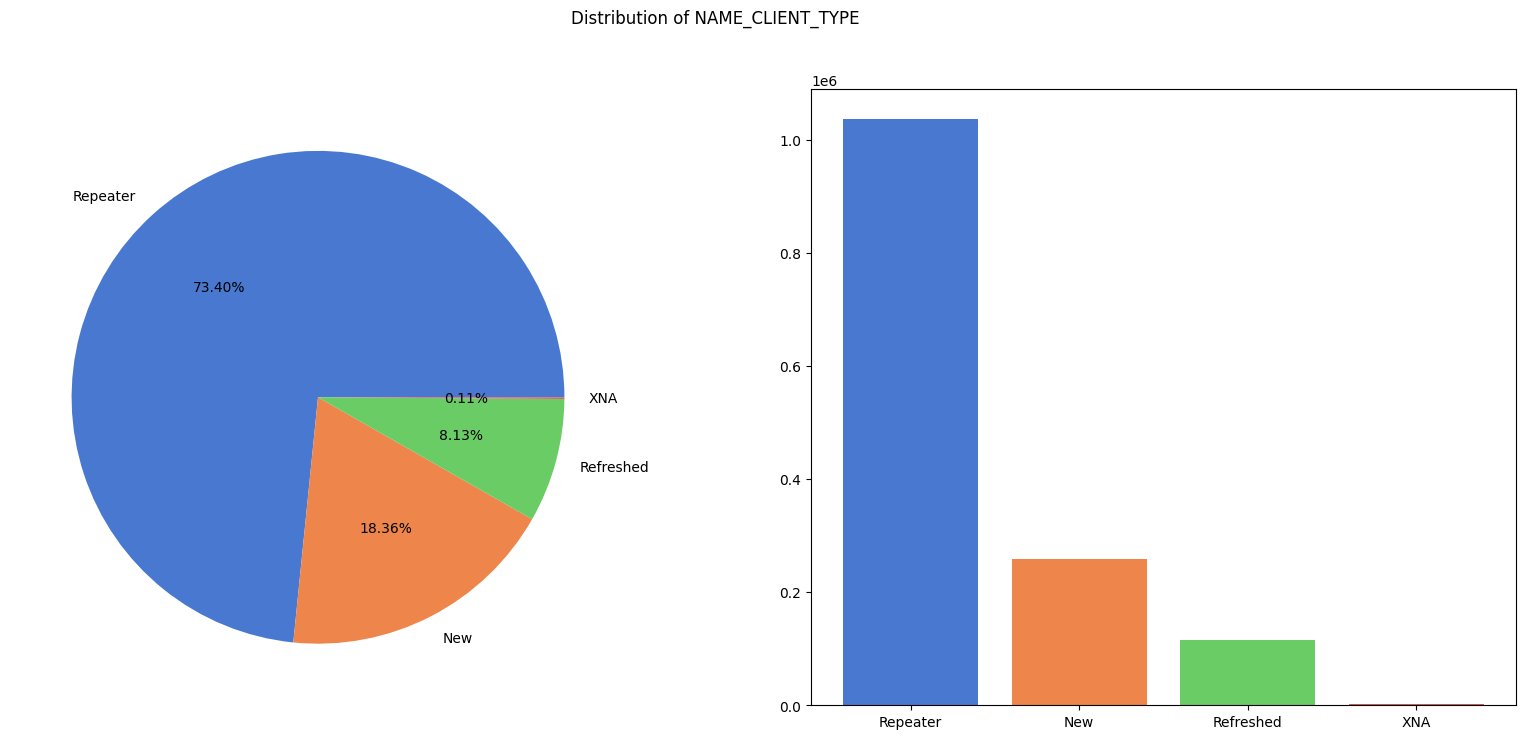

In [21]:
old_new = UnivariateAnalysis(prev)
old_new.visualize(x='NAME_CLIENT_TYPE')

This particular column defines whether the client was old or new when he/she was applying for the previous application. We can see from here that most of the applicants for the previous application were repeaters and there were very few first time applicants.

NAME_GOODS_CATEGORY: What kind of goods did the client apply for in the previous application

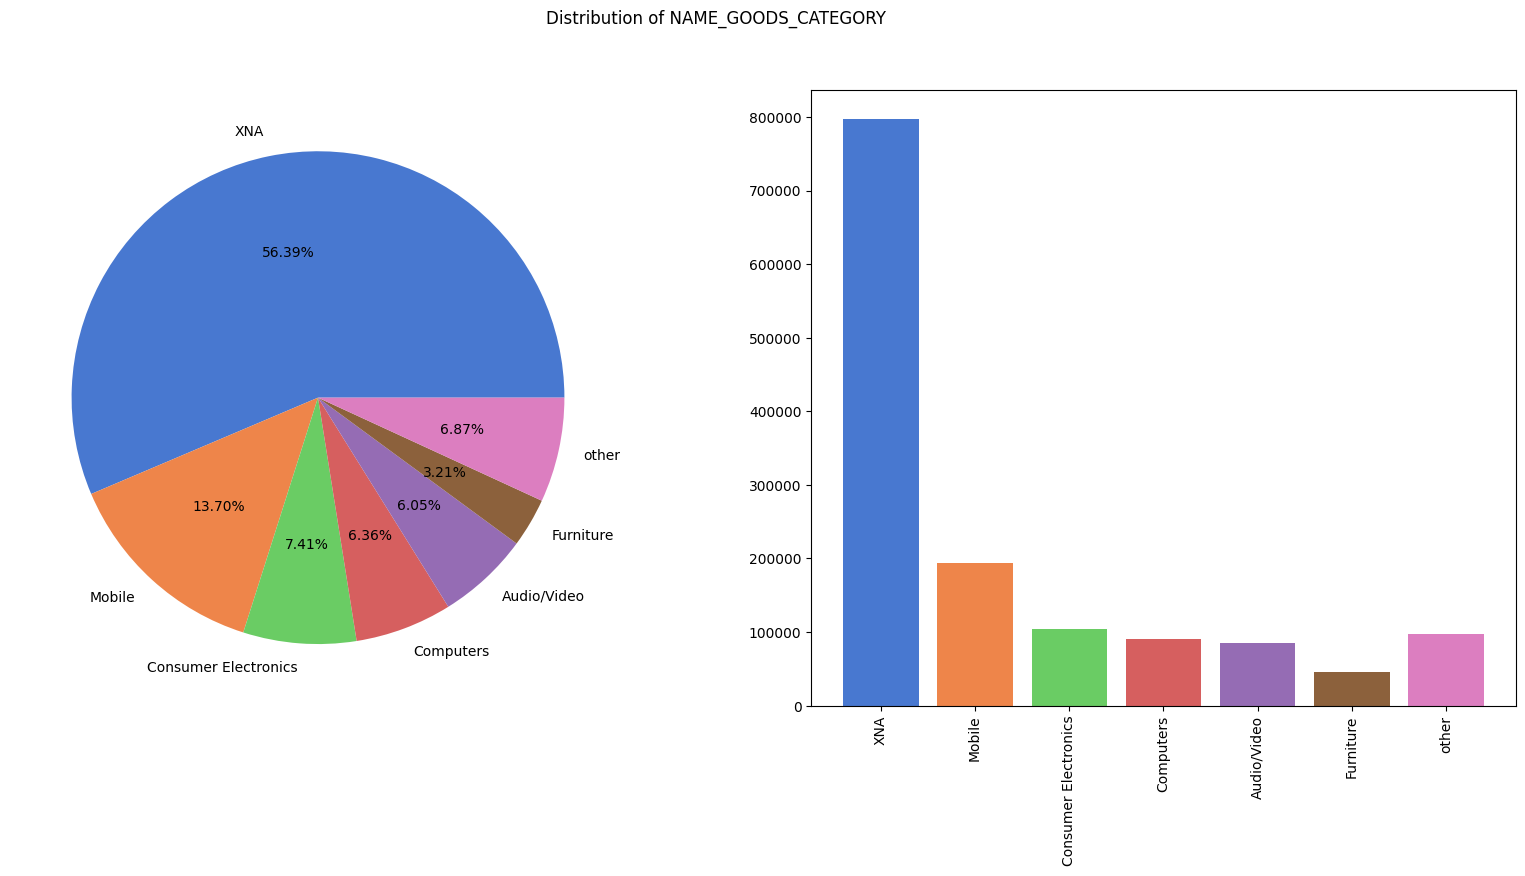

In [22]:
goods = UnivariateAnalysis(prev)
goods.visualize(x='NAME_GOODS_CATEGORY', rotate=90, create_other=True)

This defines the kind of goods that the client applied for in the previous application, and as can be seen, XNA is the most popular goods category followed by Mobiles.

NAME_PORTFOLIO: Was the previous application for CASH, POS, CAR, …

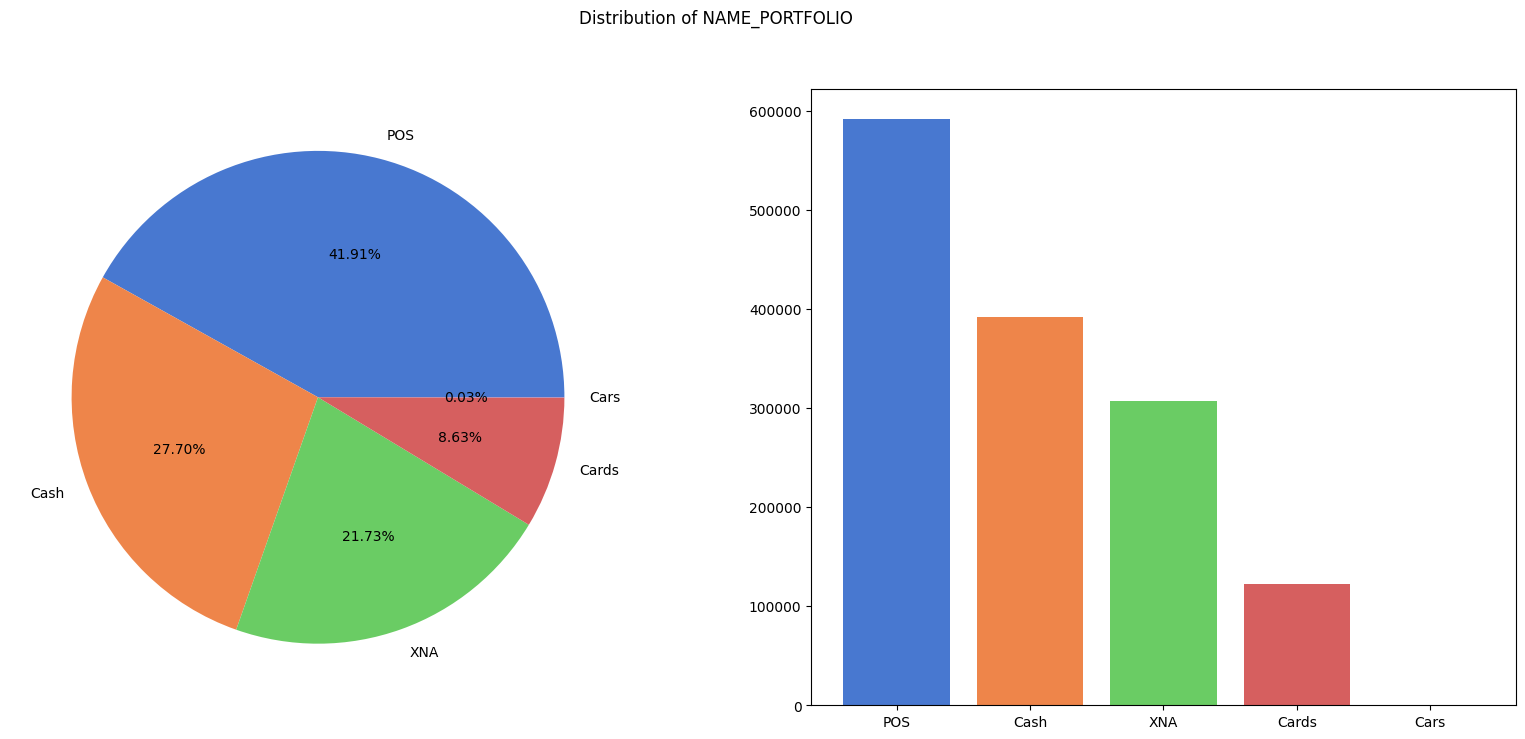

In [23]:
portfolio = UnivariateAnalysis(prev)
portfolio.visualize(x='NAME_PORTFOLIO')

This shows that most of the previous applications were for POS, which is followed by Cash and XNA.

NAME_PRODUCT_TYPE: Was the previous application x-sell or walk-in ?

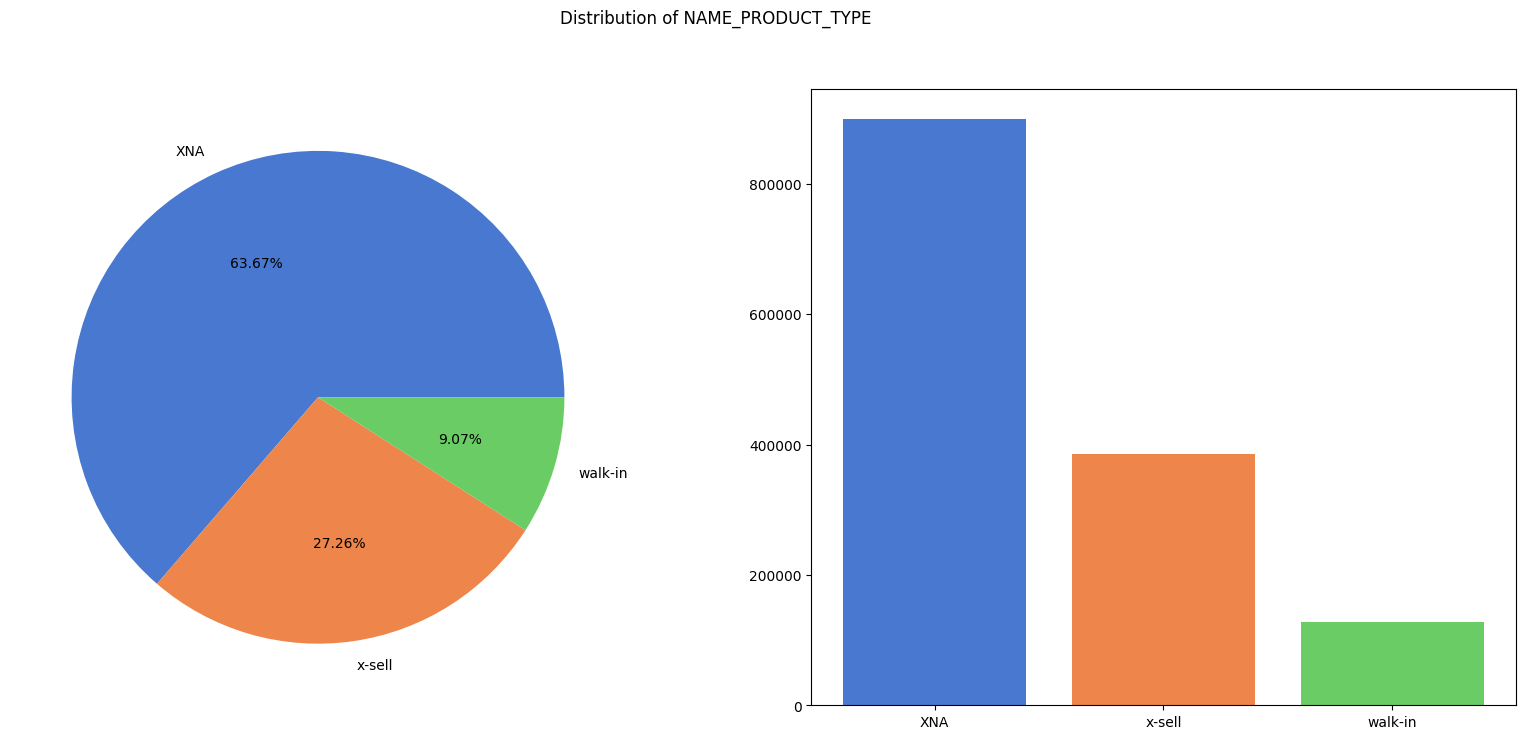

In [24]:
prod_type = UnivariateAnalysis(prev)
prod_type.visualize(x='NAME_PRODUCT_TYPE')

CHANNEL_TYPE: Top channels through which they acquired the client on the previous application

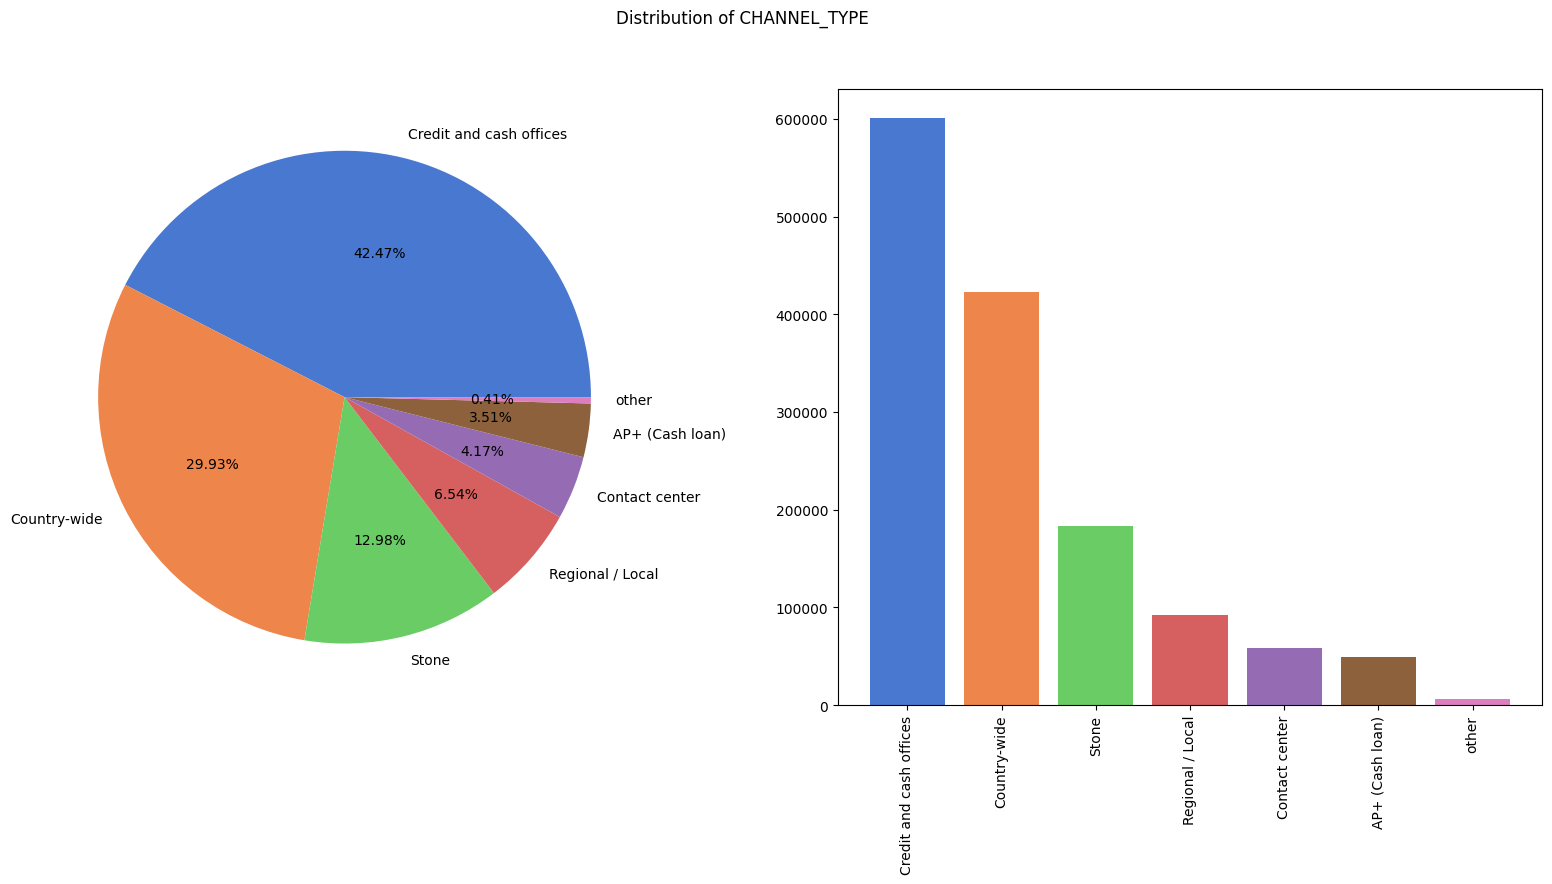

In [25]:
top_channel = UnivariateAnalysis(prev)
top_channel.visualize(x='CHANNEL_TYPE', rotate=90, create_other=True)

This shows that the banks obtained most of the clients in their previous application through Credit and Cash offices, which is followed by Country-wide.

NAME_SELLER_INDUSTRY: Top industry of the seller

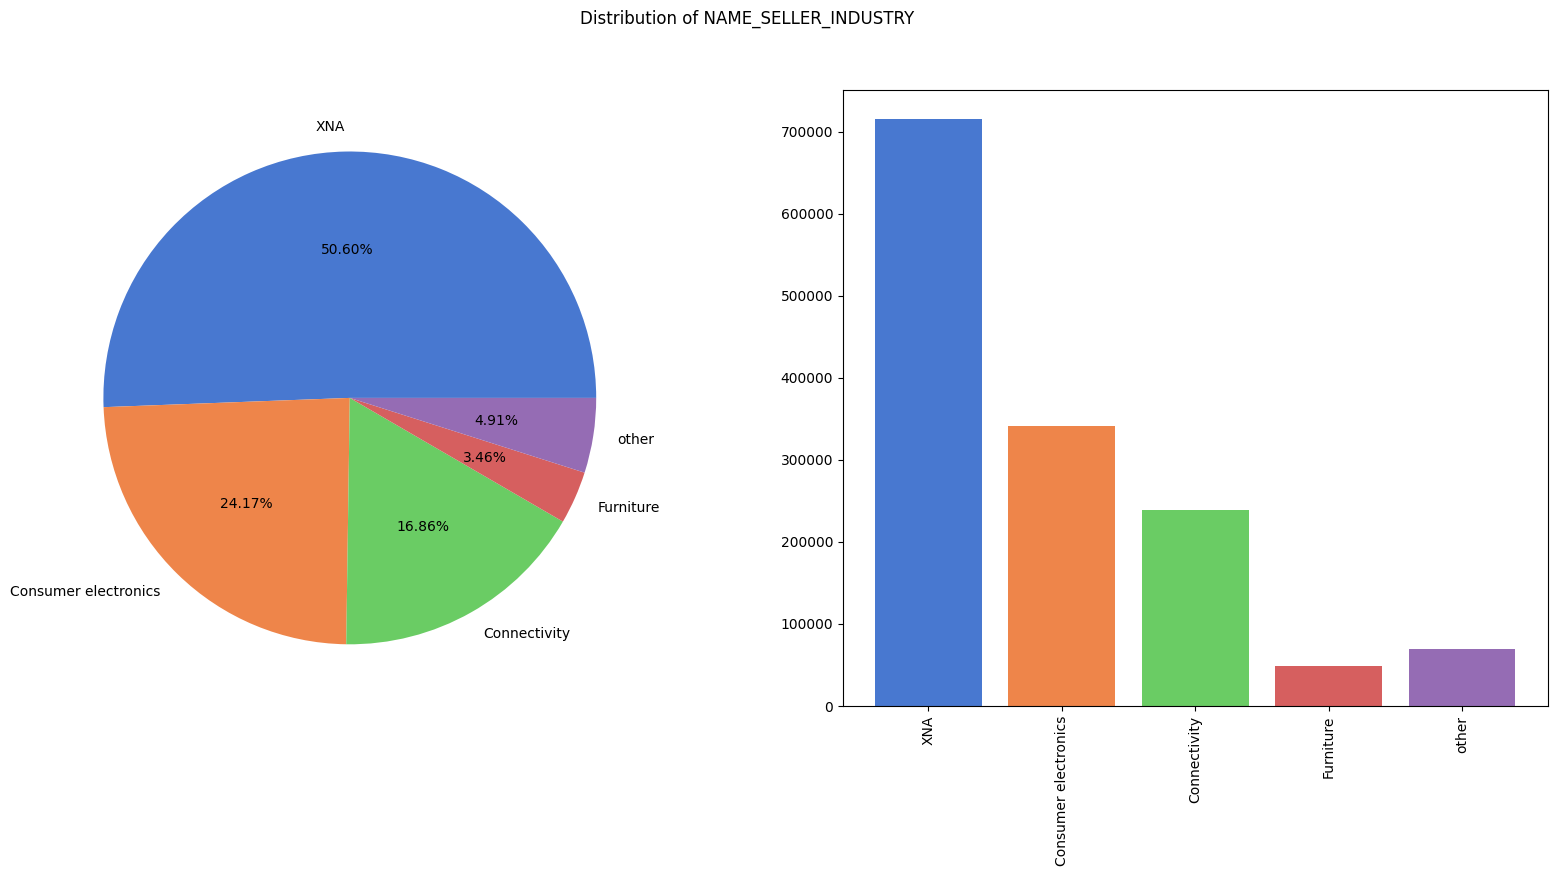

In [26]:
top_industry = UnivariateAnalysis(prev)
top_industry.visualize(x='NAME_SELLER_INDUSTRY', rotate=90, create_other=True)

NAME_YIELD_GROUP: Grouped interest rate into small medium and high of the previous application

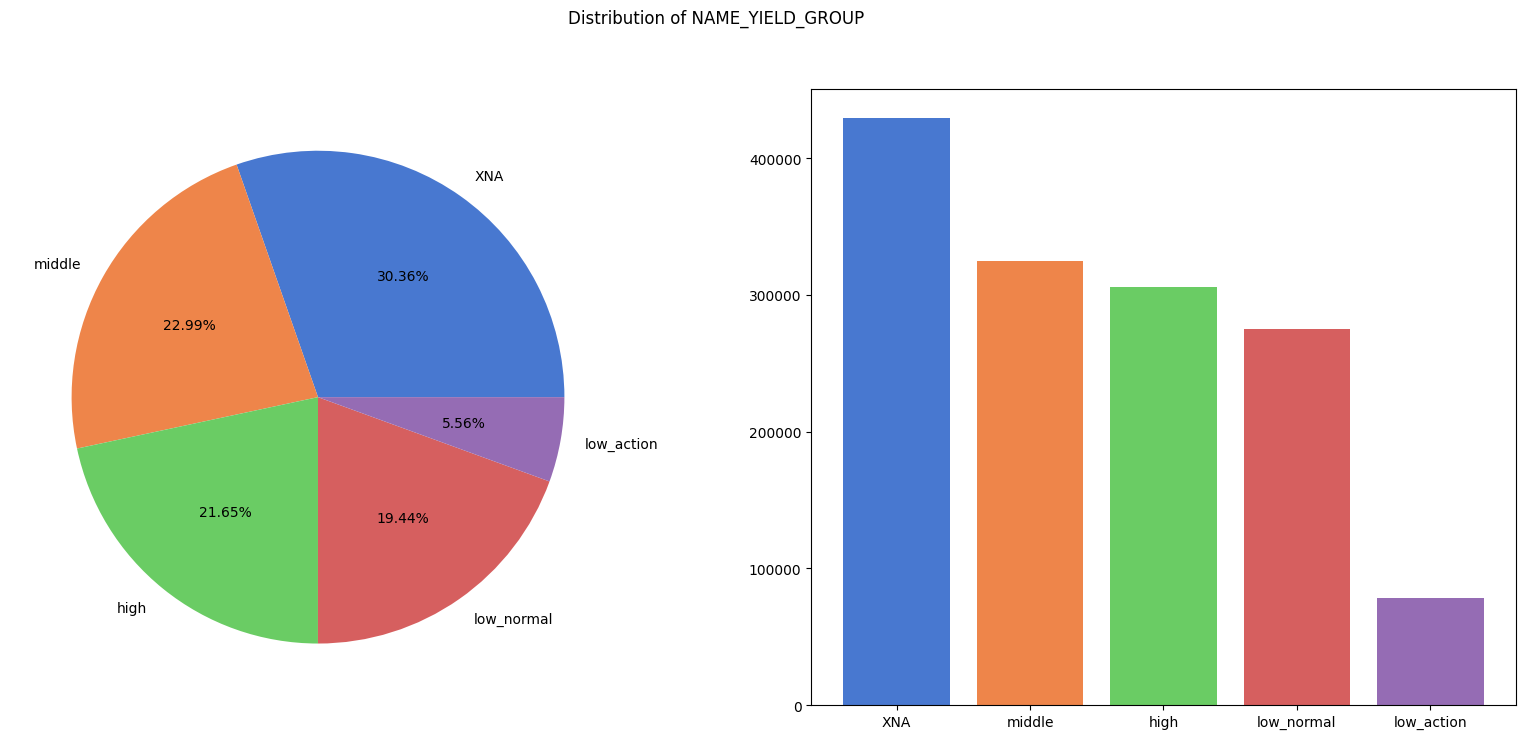

In [27]:
group = UnivariateAnalysis(prev)
group.visualize(x='NAME_YIELD_GROUP')

PRODUCT_COMBINATION: Top Detailed product combination of the previous application

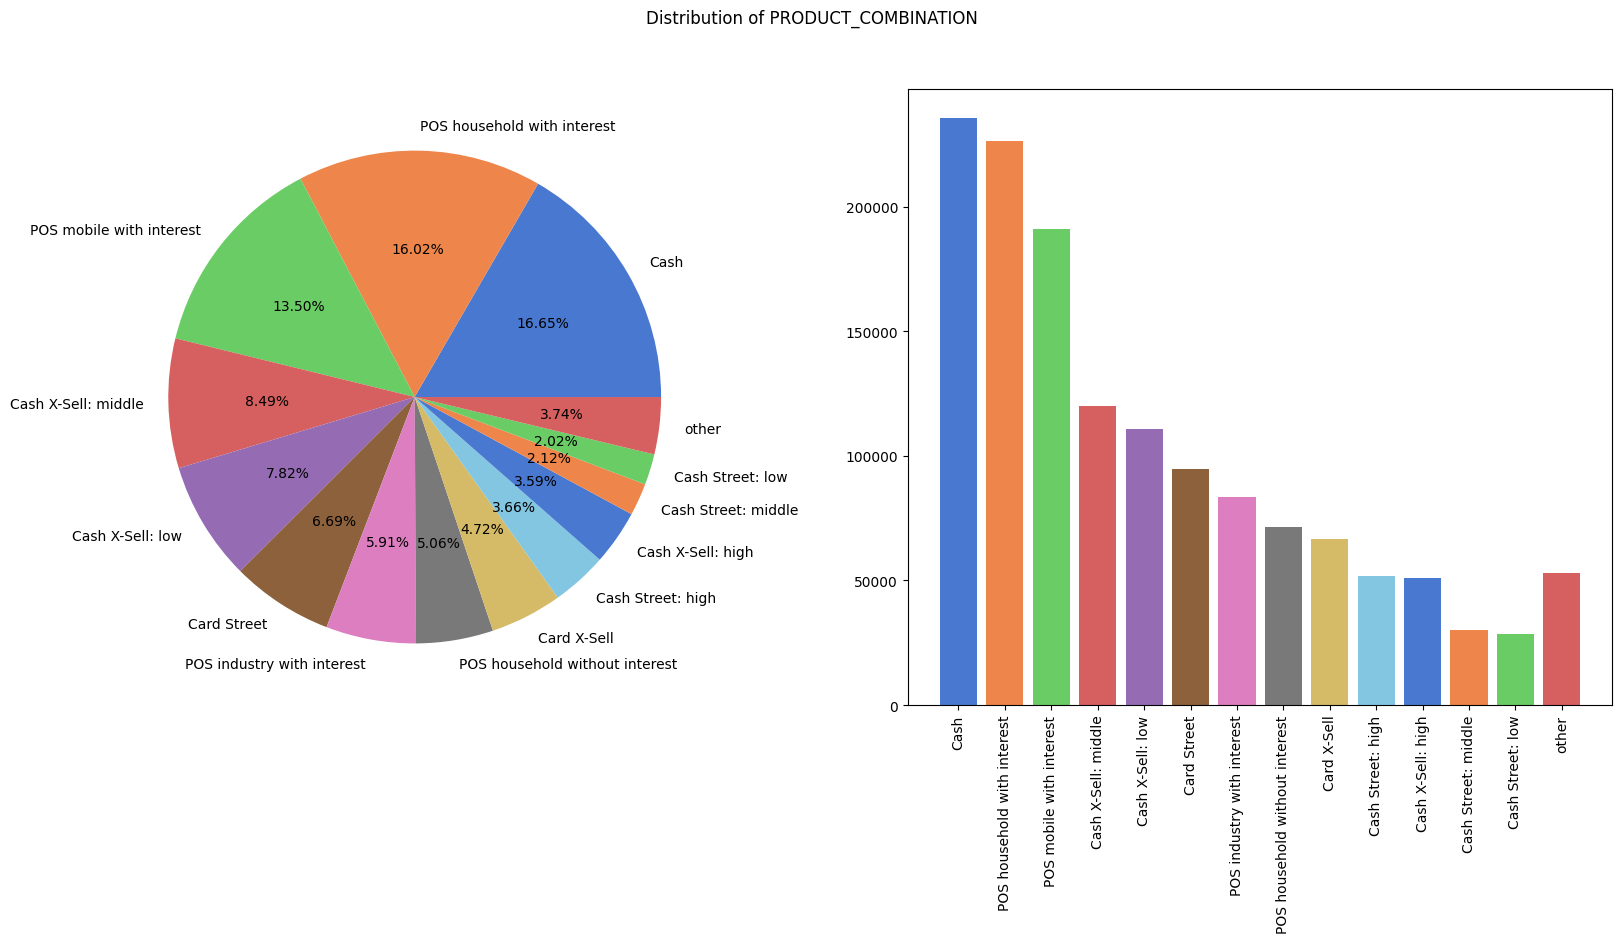

In [28]:
top_combination = UnivariateAnalysis(prev)
top_combination.visualize(x='PRODUCT_COMBINATION', rotate=90, create_other=True)

NFLAG_INSURED_ON_APPROVAL: Did the client requested insurance during the previous application

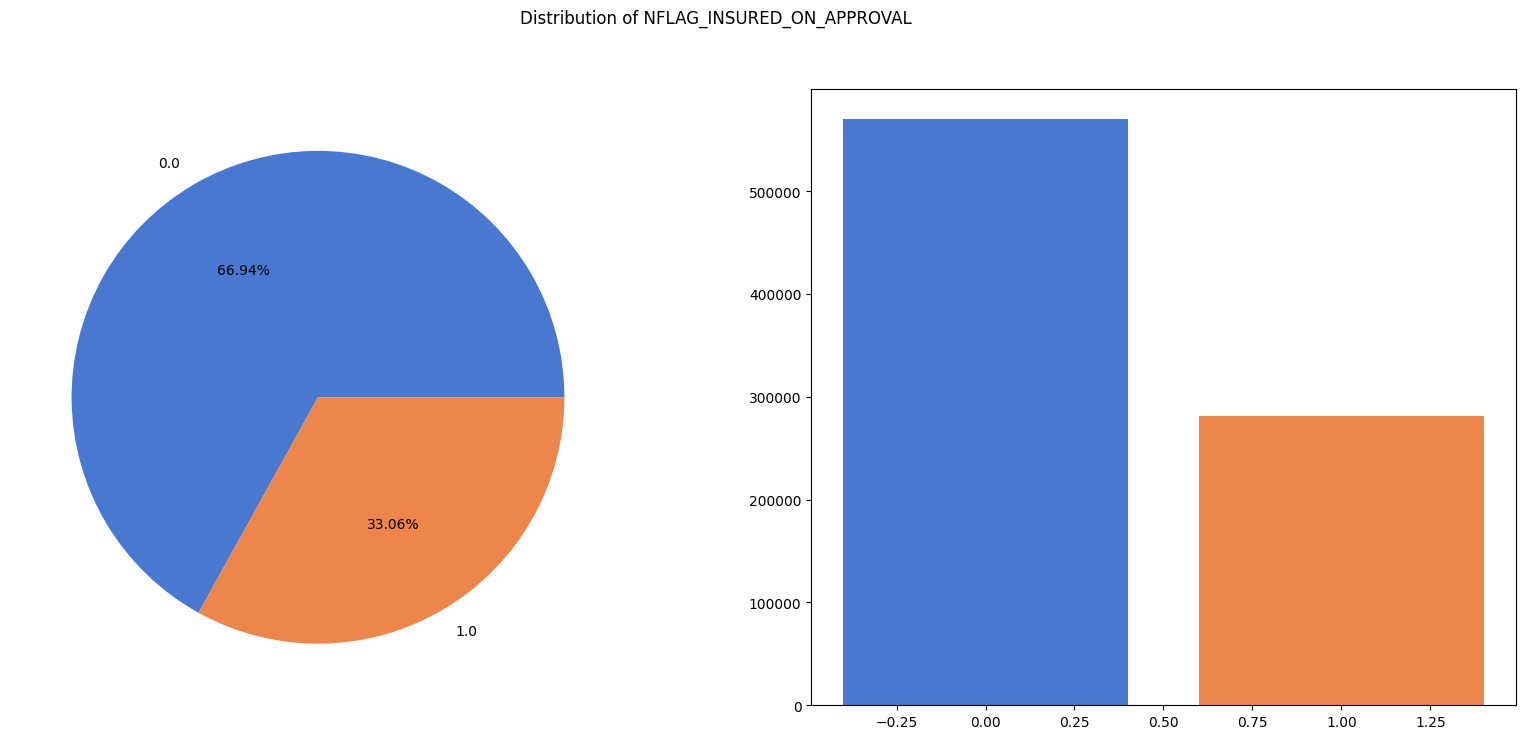

In [29]:
ins = UnivariateAnalysis(prev)
ins.visualize(x='NFLAG_INSURED_ON_APPROVAL')

**Bivariate Analysis**

In [30]:
curr = pd.read_csv('../../Dataset/dseb63_final_project_DP_dataset/dseb63_application_train.csv')
curr.head()

,Unnamed: 0,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [31]:
curr.columns

Index(['Unnamed: 0', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'SK_ID_CURR'],
      dtype='object', length=123)

In [32]:
curr.drop(columns=['Unnamed: 0'], inplace=True)

In [33]:
curr.shape

(246009, 122)

In [34]:
prev_drop = prev.drop(columns=['SK_ID_PREV'])


In [35]:
prev_merged = pd.merge(curr[['SK_ID_CURR', 'TARGET']], prev, how='left', on='SK_ID_CURR')
prev_merged

,SK_ID_CURR,TARGET,SK_ID_PREV,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,278621,0,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
1,278621,0,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
2,278621,0,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
3,139008,0,2078043.0,Cash loans,24246.000,675000.0,675000.0,NaN,675000.0,THURSDAY,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0
4,139008,0,2827850.0,Revolving loans,NaN,0.0,0.0,NaN,NaN,THURSDAY,...,XNA,NaN,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1144069,258328,0,2073384.0,Cash loans,16400.610,229500.0,254340.0,NaN,229500.0,THURSDAY,...,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1144070,258328,0,1708056.0,Revolving loans,2250.000,45000.0,45000.0,NaN,45000.0,SUNDAY,...,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1144071,258328,0,1296007.0,Cash loans,30737.655,765000.0,1067940.0,NaN,765000.0,FRIDAY,...,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1144072,258328,0,2631384.0,Cash loans,54022.140,1170000.0,1271929.5,NaN,1170000.0,FRIDAY,...,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-756.0,294.0,-66.0,-64.0,0.0


In [36]:
prev_merged.duplicated().sum()

0

**Add some feature engineering feature**

In [37]:
prev_merged['APPLICATION_CREDIT_DIFF'] = prev_merged['AMT_APPLICATION'] - prev_merged['AMT_CREDIT']
prev_merged['APPLICATION_CREDIT_RATIO'] = prev_merged['AMT_APPLICATION'] / prev_merged['AMT_CREDIT']
prev_merged["NEW_CNT_PAYMENT"] = pd.cut(x=prev_merged['CNT_PAYMENT'], bins=[0, 12, 60, 120], labels=["Short", "Middle", "Long"])
prev_merged["NEW_APP_CREDIT_RATE_RATIO"] = prev_merged["APPLICATION_CREDIT_RATIO"].apply(lambda x: 1 if (x <= 1) else 0)
prev_merged['NEW_APP_CREDIT_RATE_RATIO'] = prev_merged['NEW_APP_CREDIT_RATE_RATIO'].astype('O')
new_coding = {"0": "Yes", "1": "No"}
prev_merged['NEW_APP_CREDIT_RATE_RATIO'] = prev_merged['NEW_APP_CREDIT_RATE_RATIO'].replace(new_coding)

In [38]:
stat = StatisticAnalysis(prev_merged)

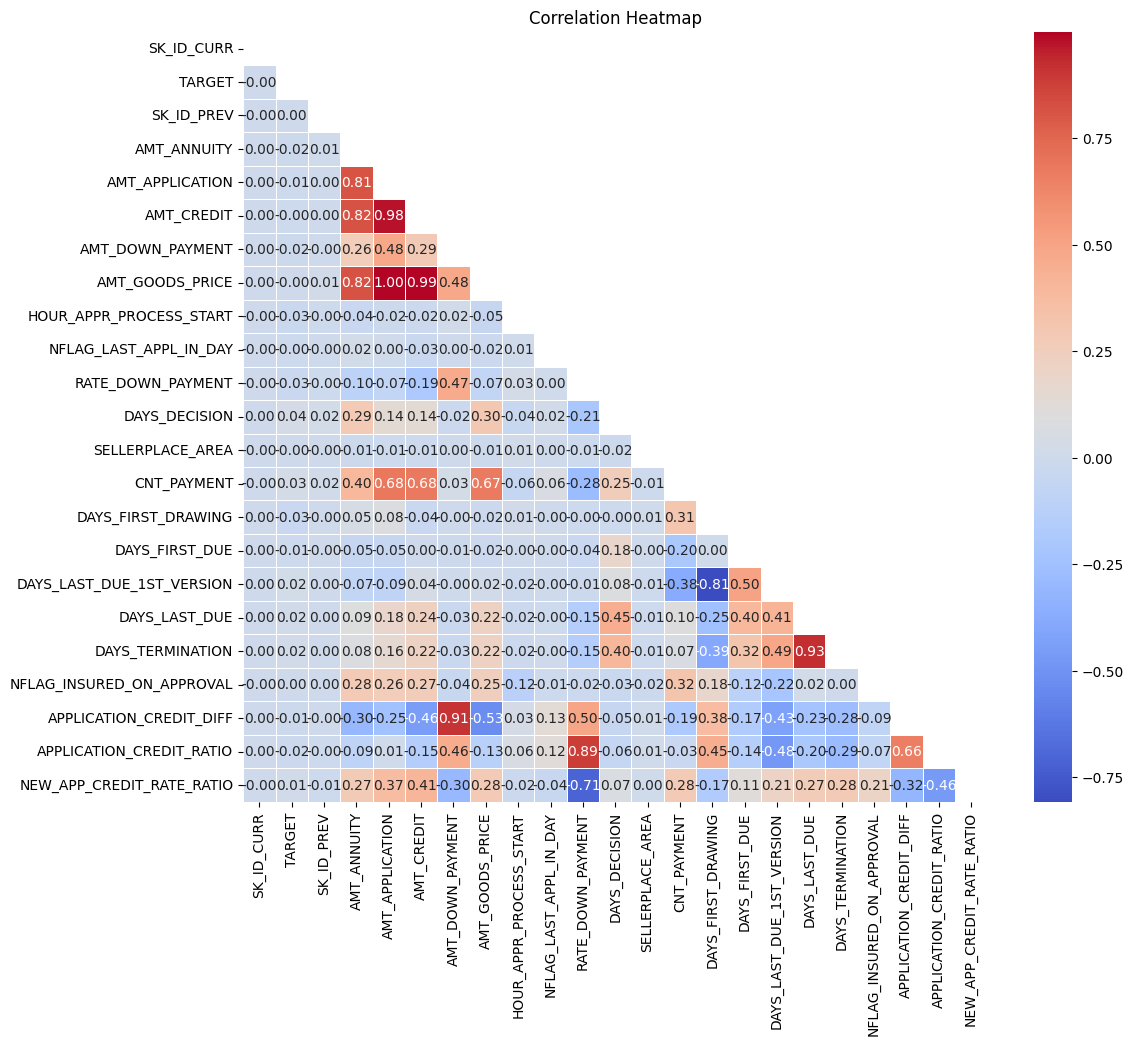

In [39]:
stat.correlation()

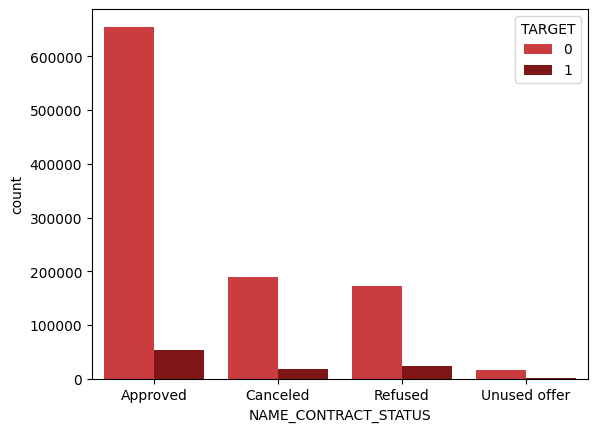

In [40]:
ax = sns.countplot(prev_merged, x='NAME_CONTRACT_STATUS', hue='TARGET', palette=['#E3242B', '#900603'])

In [41]:
default = prev_merged[prev_merged['TARGET']==1]
non_default = prev_merged[prev_merged['TARGET']==0]

In [42]:
total_approved = prev_merged[prev_merged['NAME_CONTRACT_STATUS'] == 'Approved'].shape[0]
default_approved = default[(prev_merged['NAME_CONTRACT_STATUS'] == 'Approved')].shape[0]
print(f'Default rate of customers who previous application was approved: {default_approved/total_approved * 100} %')

Default rate of customers who previous application was approved: 7.583832968893278 %


In [43]:
total_refused = prev_merged[prev_merged['NAME_CONTRACT_STATUS'] == 'Refused'].shape[0]
nondefault_refused = non_default[(prev_merged['NAME_CONTRACT_STATUS'] == 'Refused')].shape[0]
print(f'Non-default rate of customers who previous application was refused: {nondefault_refused/total_refused * 100} %')

Non-default rate of customers who previous application was refused: 88.08011176488584 %


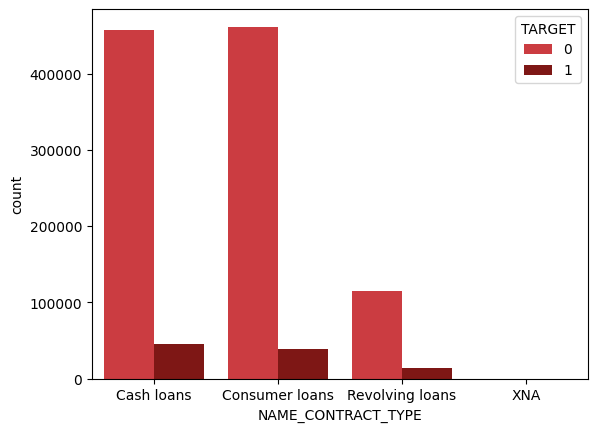

In [44]:
ax = sns.countplot(prev_merged, x='NAME_CONTRACT_TYPE', hue='TARGET', palette=['#E3242B', '#900603'])

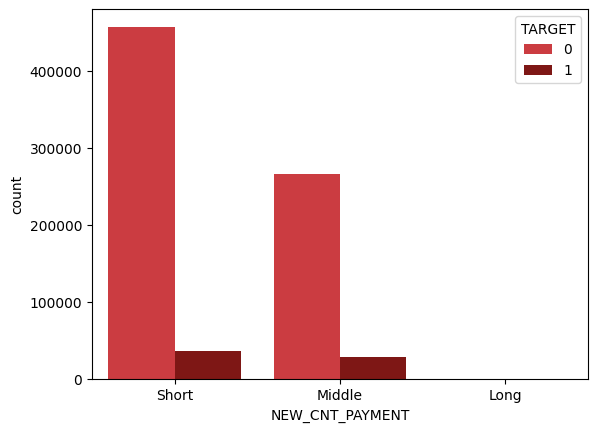

In [45]:
ax = sns.countplot(prev_merged, x='NEW_CNT_PAYMENT', hue='TARGET', palette=['#E3242B', '#900603'])

AMT_ANNUITY vs AMT_DOWN_PAYMENT

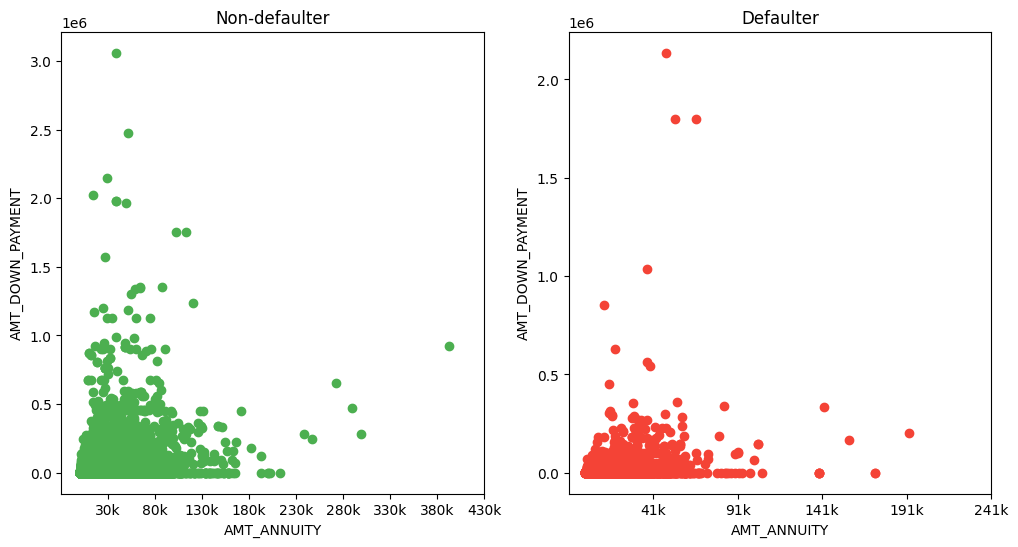

In [46]:
test = BivariateAnalysis()
test.scatter_plot(non_default, default, 'AMT_ANNUITY', 'AMT_DOWN_PAYMENT')

The annual payment amount (AMT_ANNUITY) and the down payment amount (AMT_DOWN_PAYMENT) exhibit a contrasting relationship in the customer file concerning loan repayment issues. As the annual payment amount (AMT_ANNUITY) increases, the number of defaulters tends to increase. Conversely, as the down payment amount increases, the number of defaulters decreases.

Non-defaulting customer groups typically tend to have higher annual payment amounts and down payment amounts compared to the defaulting customer groups.


HOUR_PROCESS_START

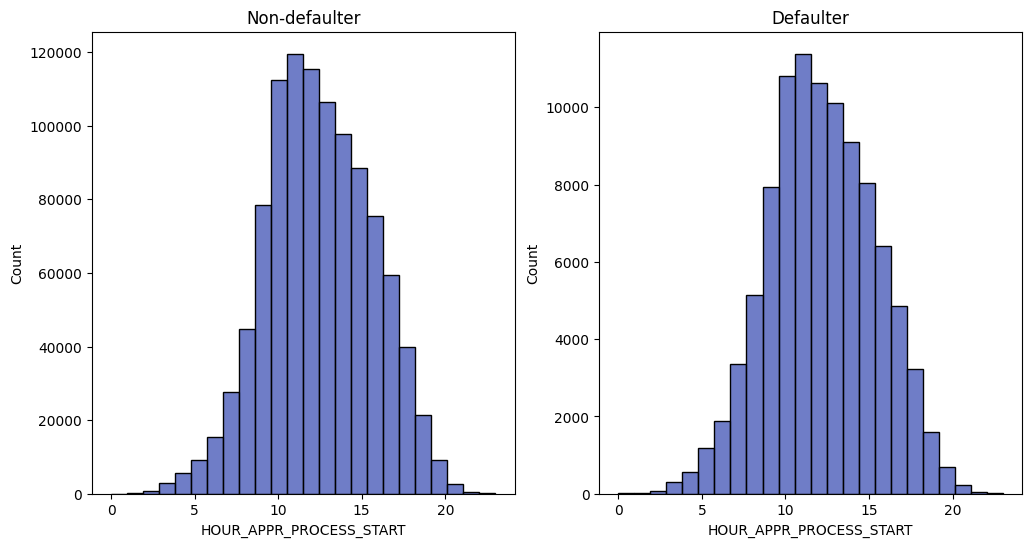

In [47]:
test.hist_plot(x="HOUR_APPR_PROCESS_START", df1=non_default, df2=default, bins=24)

- The majority of loan applications are registered between 10:00 AM to 12:00 PM.
- The distribution for both groups is almost identical, indicating that it does not contribute significantly to prediction.

WEEKDAY_APPR_PROCESS_START

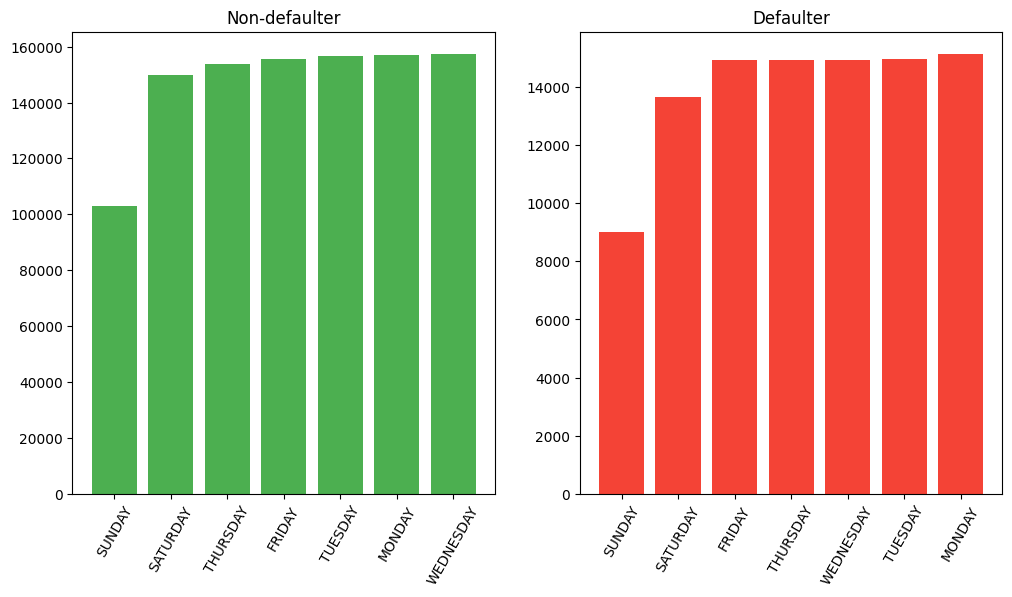

In [48]:
test.bar_plot(x='WEEKDAY_APPR_PROCESS_START', df1=non_default, df2=default, rotation=60)

Features are quite similar for both groups, implying limited predictive value for the target variable.

DAYS_DECISION, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION, DAY_TERMINATION

DAYS_DECISION


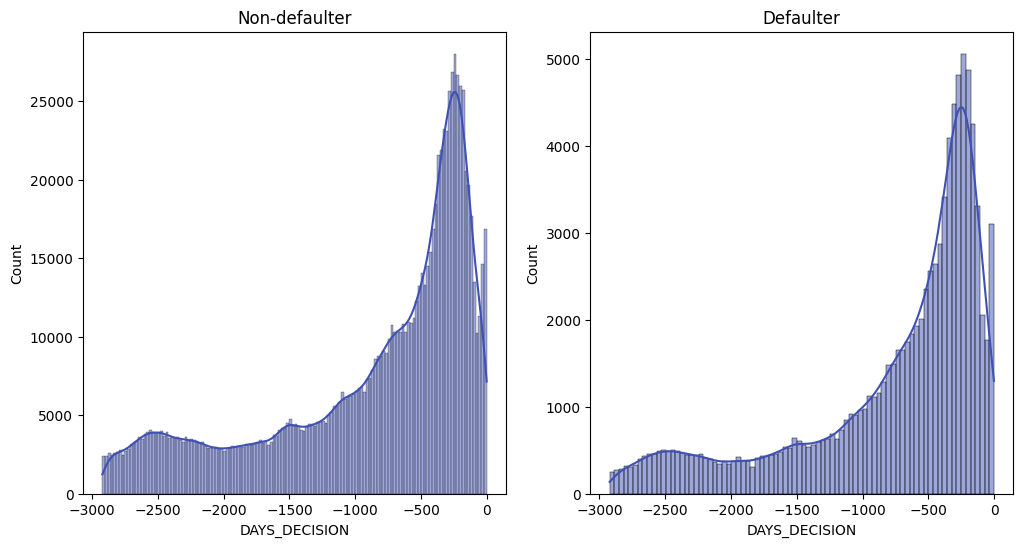

DAYS_FIRST_DRAWING


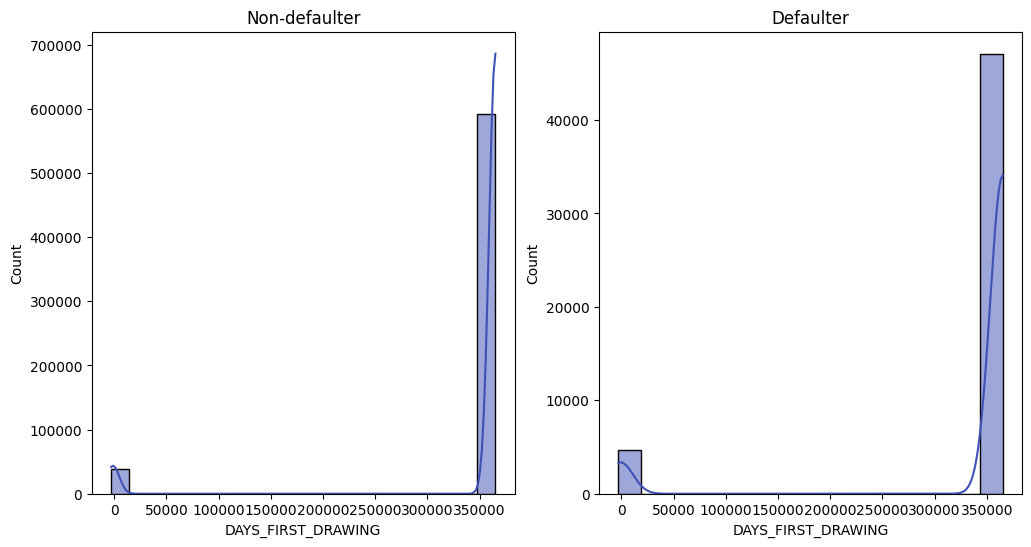

DAYS_FIRST_DUE


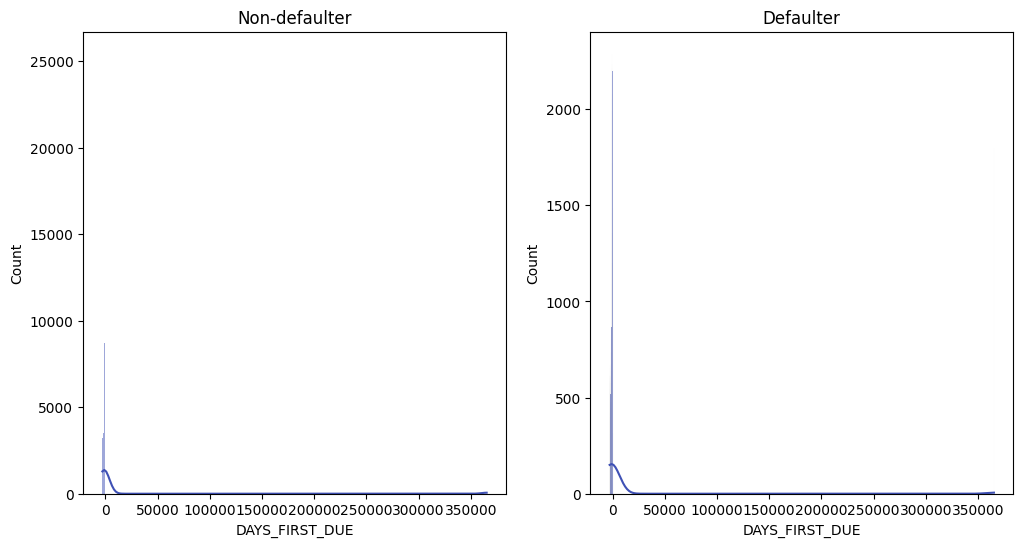

DAYS_LAST_DUE


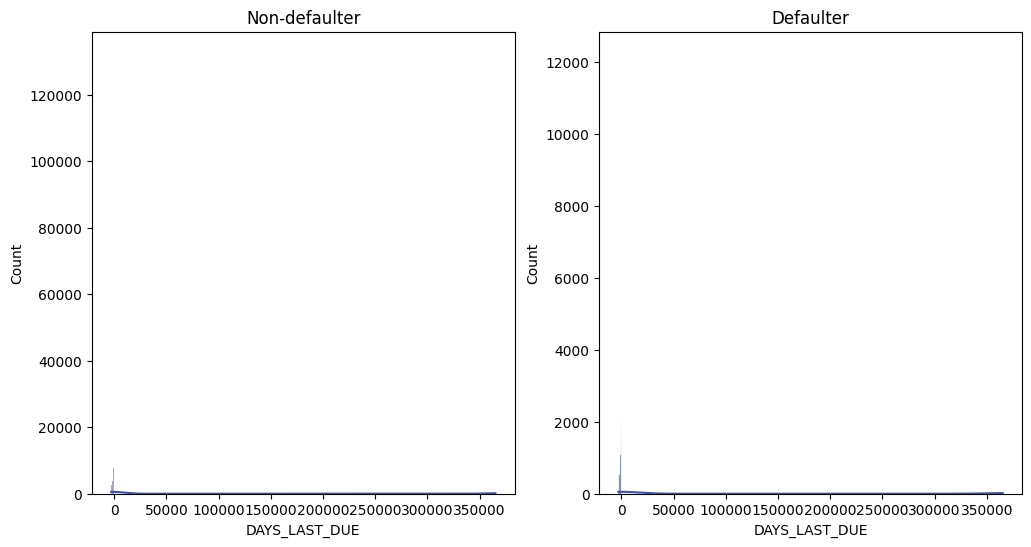

DAYS_LAST_DUE_1ST_VERSION


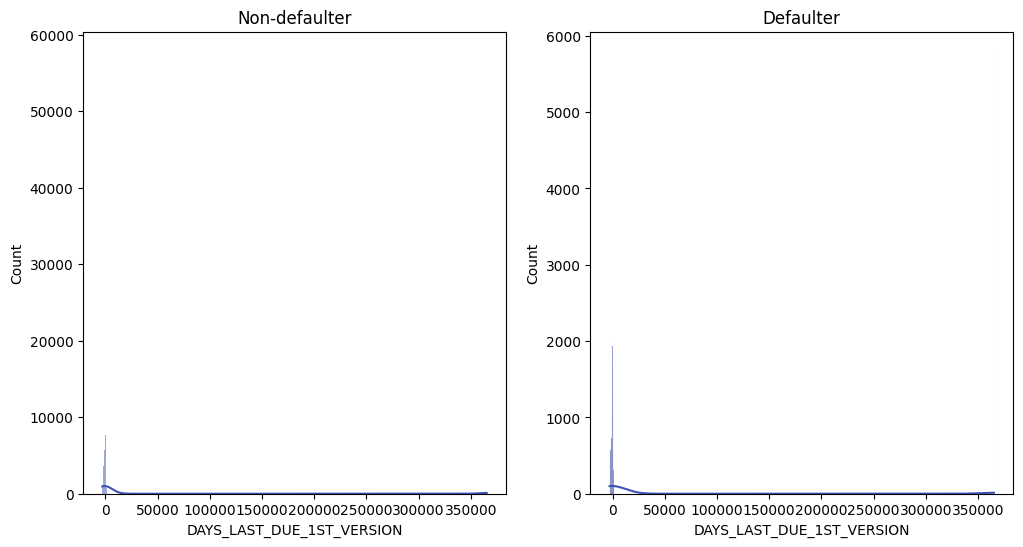

DAYS_TERMINATION


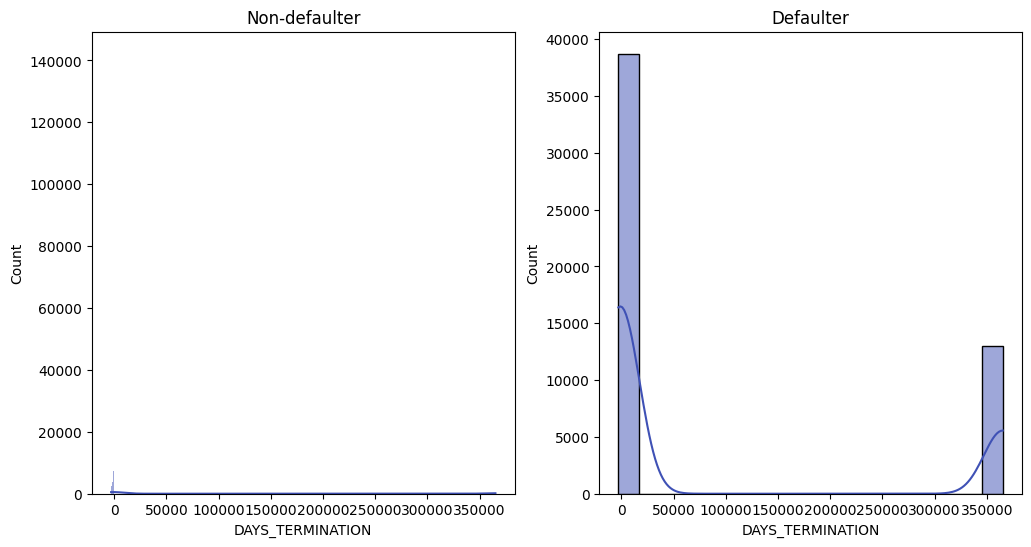

In [49]:
day_cols = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_TERMINATION']
for c in day_cols:
    print(c)
    test.hist_plot(x=c, df1=non_default, df2=default, bins='auto', kde=True)

DAY_DECISIONS, DAYS_FIRST_DRAWING, DAYS_FIRST_DUE, DAYS_LAST_DUE, DAYS_LAST_DUE_1ST_VERSION have similar distributions across both groups, suggesting limited impact on the TARGET variable.


RATE_DOWN_PAYMENT

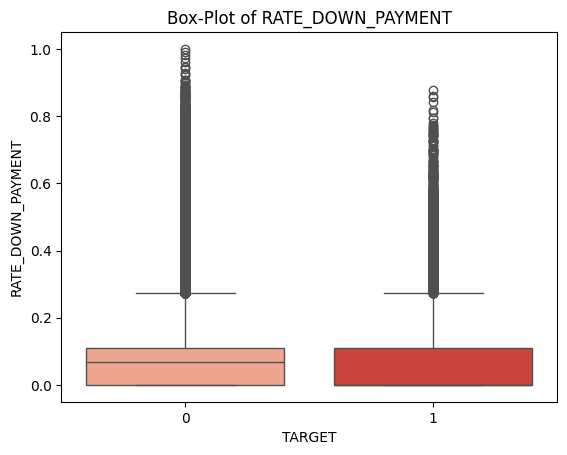

In [50]:
test.box_plot(y='RATE_DOWN_PAYMENT', data_to_plot=prev_merged)

In [51]:
print('Non-defaulter')
non_default['RATE_DOWN_PAYMENT'].describe()

Non-defaulter


count    490355.000000
mean          0.081100
std           0.108688
min          -0.000015
25%           0.000000
50%           0.067511
75%           0.108914
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [52]:
print('Defaulter')
default['RATE_DOWN_PAYMENT'].describe()

Defaulter


count    40553.000000
mean         0.070795
std          0.099221
min          0.000000
25%          0.000000
50%          0.000000
75%          0.108909
max          0.878301
Name: RATE_DOWN_PAYMENT, dtype: float64

Customers with lower RATE_DOWN_PAYMENT in previous applications tend to default on their loans.

In [53]:
payment_cols = ['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT','AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE']

AMT_ANNUITY


Non-defaulters: count    811419.000000
mean      15908.567738
std       14842.117698
min           0.000000
25%        6286.590000
50%       11249.370000
75%       20490.885000
max      417927.645000
Name: AMT_ANNUITY, dtype: float64
Defaulters: count     73760.000000
mean      15066.338756
std       13509.809939
min           0.000000
25%        5905.518750
50%       10865.025000
75%       19828.485000
max      281027.250000
Name: AMT_ANNUITY, dtype: float64


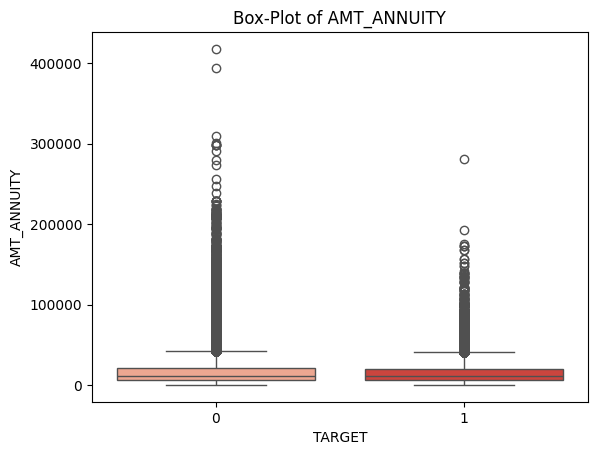

AMT_APPLICATION
Non-defaulters: count    1.033268e+06
mean     1.759222e+05
std      2.946799e+05
min      0.000000e+00
25%      2.020500e+04
50%      7.166700e+04
75%      1.800000e+05
max      5.850000e+06
Name: AMT_APPLICATION, dtype: float64
Defaulters: count    9.762300e+04
mean     1.691095e+05
std      2.849821e+05
min      0.000000e+00
25%      0.000000e+00
50%      6.606000e+04
75%      1.800000e+05
max      3.982500e+06
Name: AMT_APPLICATION, dtype: float64


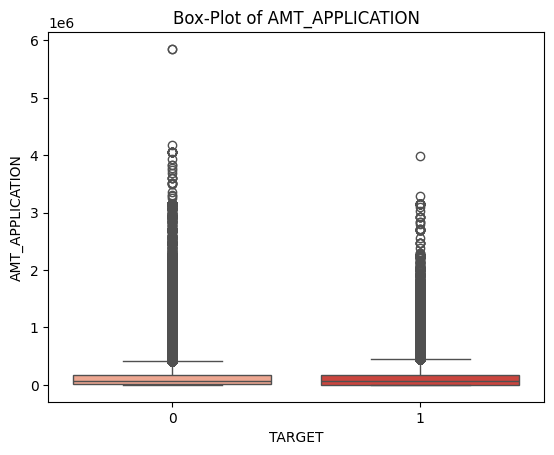

AMT_CREDIT
Non-defaulters: count    1.033268e+06
mean     1.967635e+05
std      3.201673e+05
min      0.000000e+00
25%      2.534400e+04
50%      8.099550e+04
75%      2.156400e+05
max      4.509688e+06
Name: AMT_CREDIT, dtype: float64
Defaulters: count    9.762300e+04
mean     1.930914e+05
std      3.142824e+05
min      0.000000e+00
25%      2.020500e+04
50%      7.448850e+04
75%      2.250000e+05
max      3.524220e+06
Name: AMT_CREDIT, dtype: float64


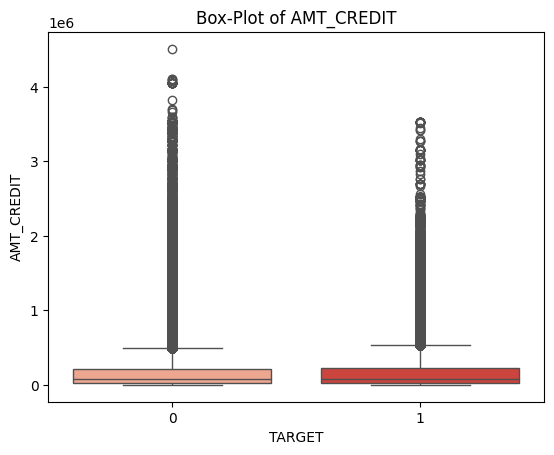

AMT_DOWN_PAYMENT
Non-defaulters: count    4.903550e+05
mean     6.784889e+03
std      2.125049e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.809000e+03
75%      7.915500e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64
Defaulters: count    4.055300e+04
mean     5.470812e+03
std      2.267898e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      6.071400e+03
max      2.135700e+06
Name: AMT_DOWN_PAYMENT, dtype: float64


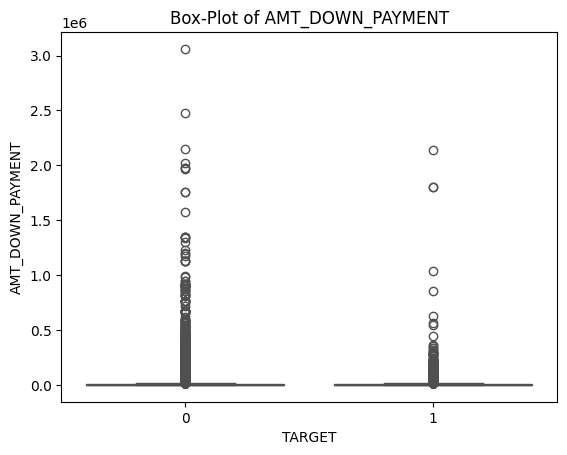

AMT_GOODS_PRICE
Non-defaulters: count    8.021630e+05
mean     2.266336e+05
std      3.168268e+05
min      0.000000e+00
25%      5.017500e+04
50%      1.102500e+05
75%      2.295000e+05
max      5.850000e+06
Name: AMT_GOODS_PRICE, dtype: float64
Defaulters: count    7.318400e+04
mean     2.256916e+05
std      3.092723e+05
min      0.000000e+00
25%      4.630500e+04
50%      1.107000e+05
75%      2.360138e+05
max      3.982500e+06
Name: AMT_GOODS_PRICE, dtype: float64


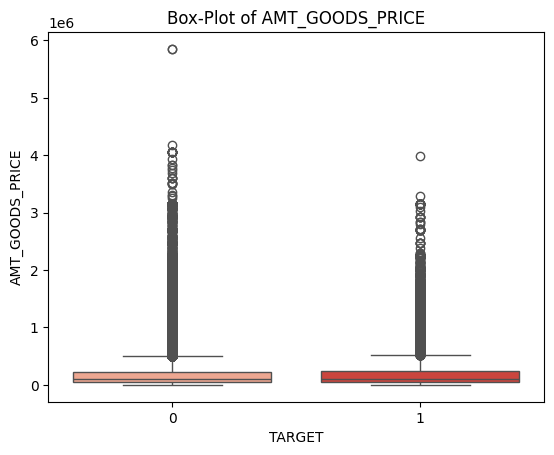

In [54]:
for c in payment_cols:
    print(c)
    print(f'Non-defaulters: {non_default[c].describe()}')
    print(f'Defaulters: {default[c].describe()}')
    test.box_plot(y=c, data_to_plot=prev_merged)


- AMT_ANNUITY and AMT_CREDIT are higher for the non-default group compared to the default group, with quantiles not significantly different.
- The proportion of customers with AMT_APPLICATION = 0 is much higher in the default group than in the non-default group, indicating that customers with lower AMT_APPLICATION are more likely to default.
- The proportion of AMT_DOWN_PAYMENT is similar to AMT_APPLICATION.
=> the following payment-related variables seem to be more important: AMT_DOWN_PAYMENT, AMT_APPLICATION, RATE_DOWN_PAYMENT

**Percentage of defaulter**

In [55]:
cat_col = prev_merged.select_dtypes(include=['object']).columns

NAME_CONTRACT_TYPE


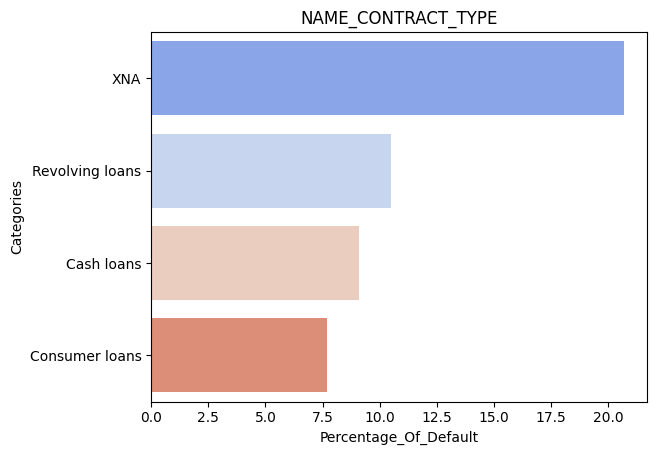

WEEKDAY_APPR_PROCESS_START


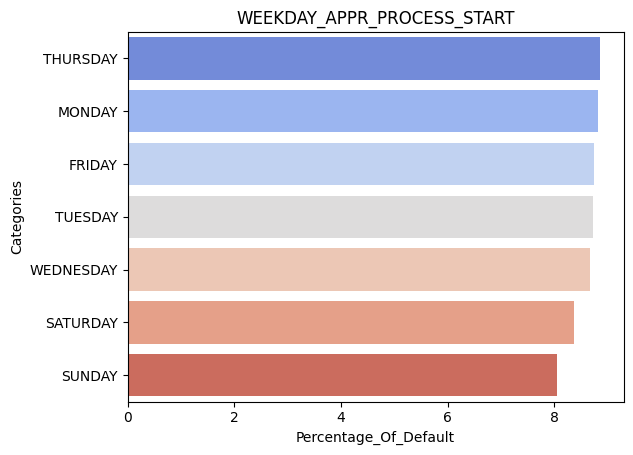

FLAG_LAST_APPL_PER_CONTRACT


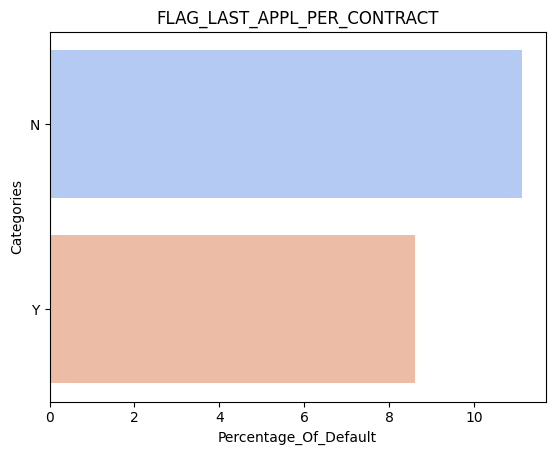

NAME_CASH_LOAN_PURPOSE


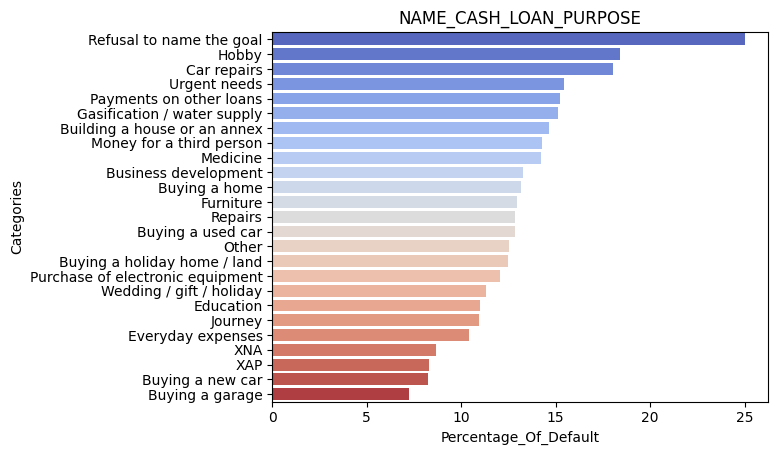

NAME_CONTRACT_STATUS


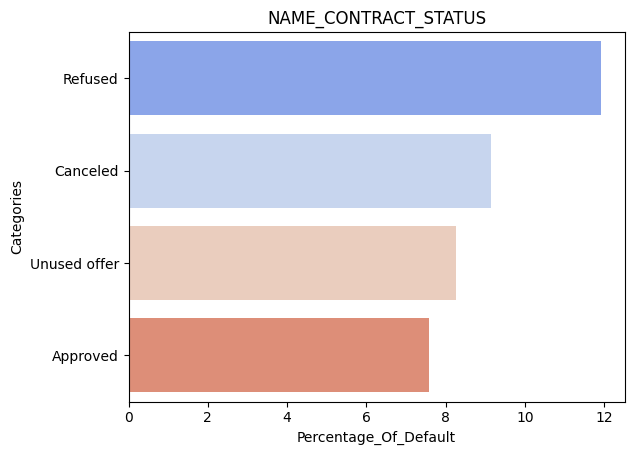

NAME_PAYMENT_TYPE


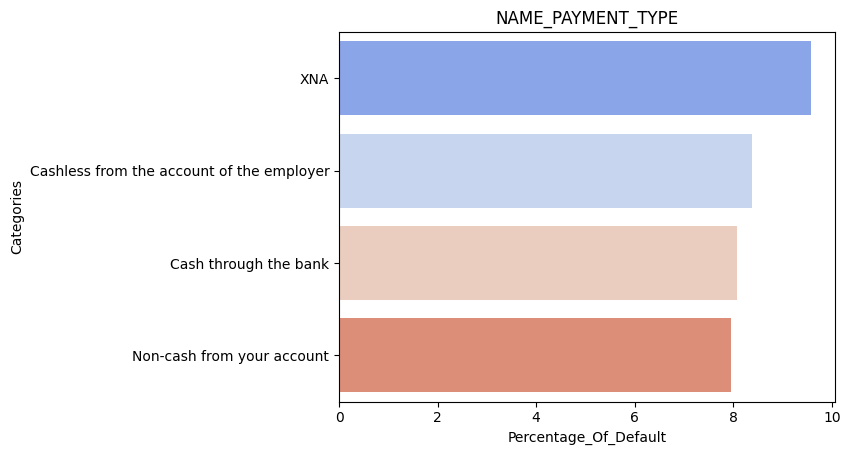

CODE_REJECT_REASON


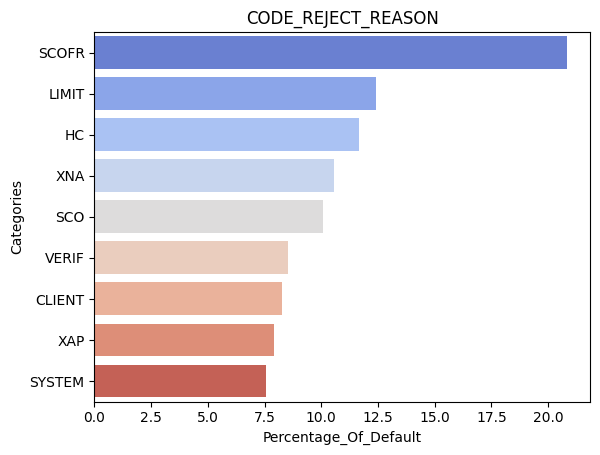

NAME_TYPE_SUITE


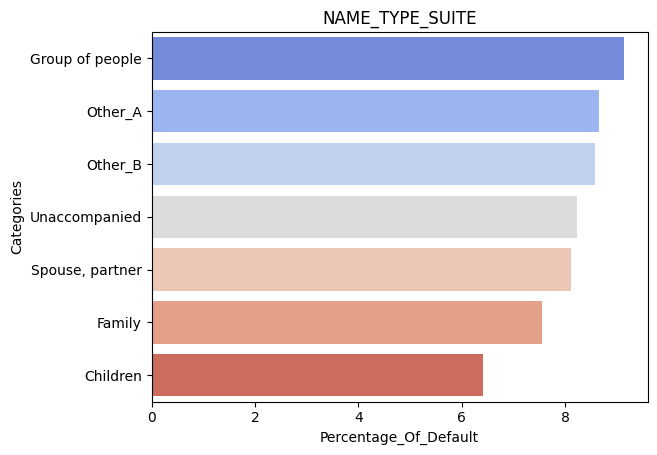

NAME_CLIENT_TYPE


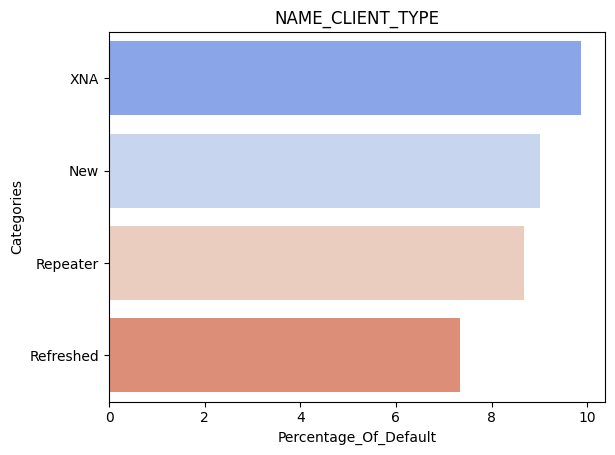

NAME_GOODS_CATEGORY


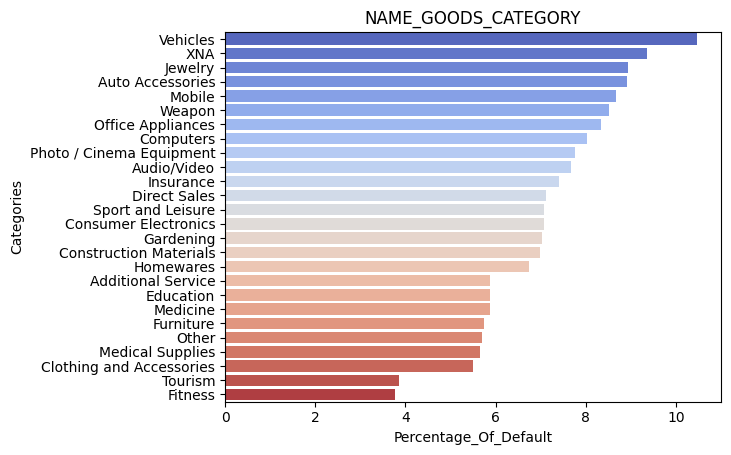

NAME_PORTFOLIO


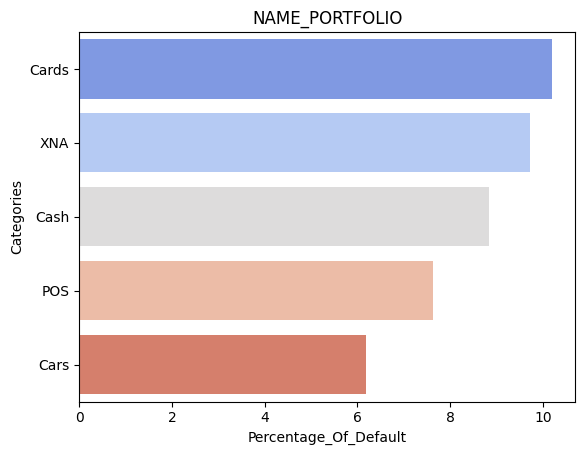

NAME_PRODUCT_TYPE


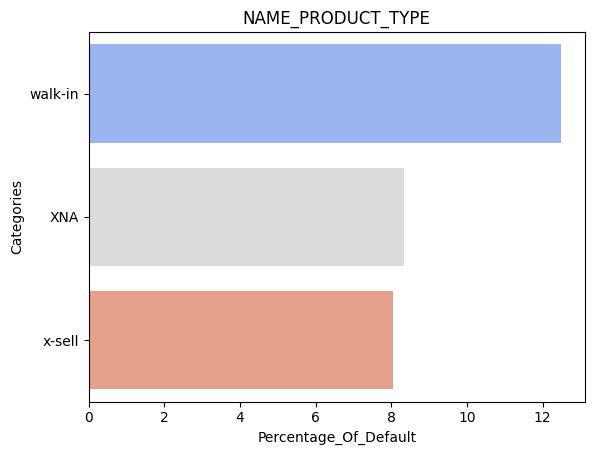

CHANNEL_TYPE


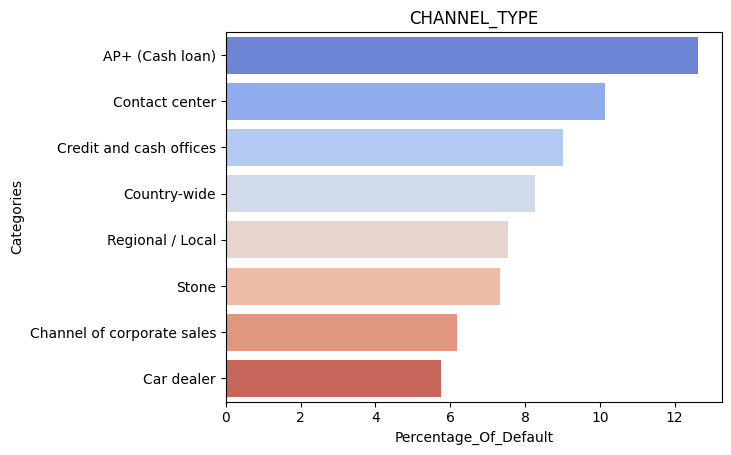

NAME_SELLER_INDUSTRY


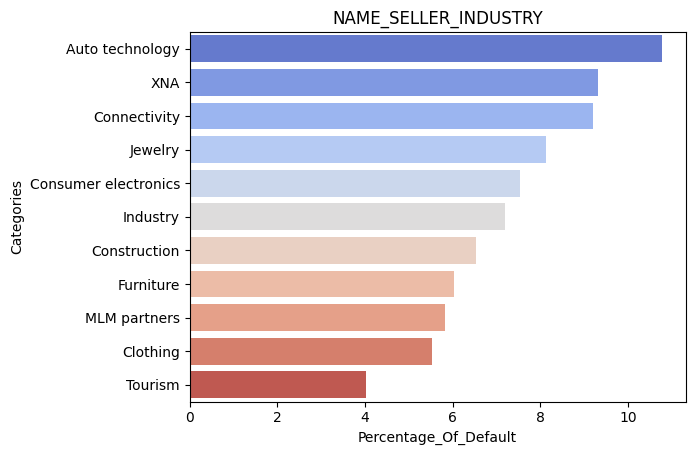

NAME_YIELD_GROUP


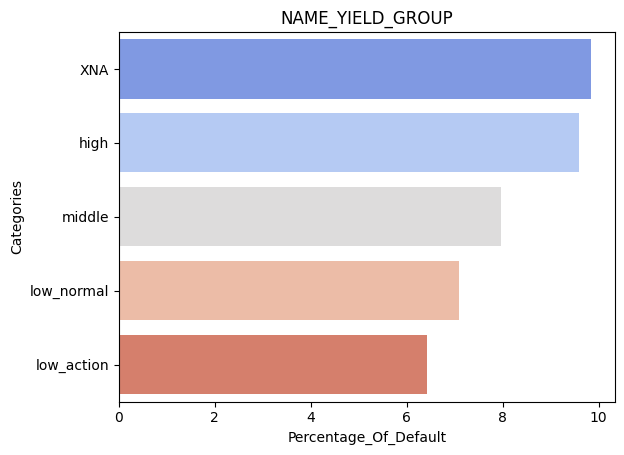

PRODUCT_COMBINATION


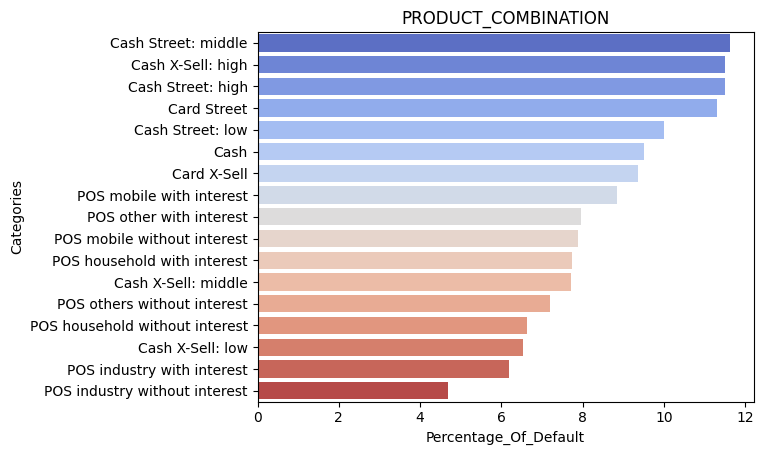

In [56]:
for c in cat_col:
    print(c)
    test.percentage_of_defauter_per_cat(prev_merged, c)


- Customers refuse to name the goal of loan are the most likely to become the defaulters
- Customers who are XNA are the most likely to become the defaulters
- Customers who is rejected because of SCOFR are the most likely to become defaulters
- Customers who has channel_tyle are AP+ are the most likely to become defaulters
- People apply to buy Vehicles are the most likely to become defaulters
- Customers who have product combination is Cash Street are the most likely to become defaulters

# Analyzing the engineered features


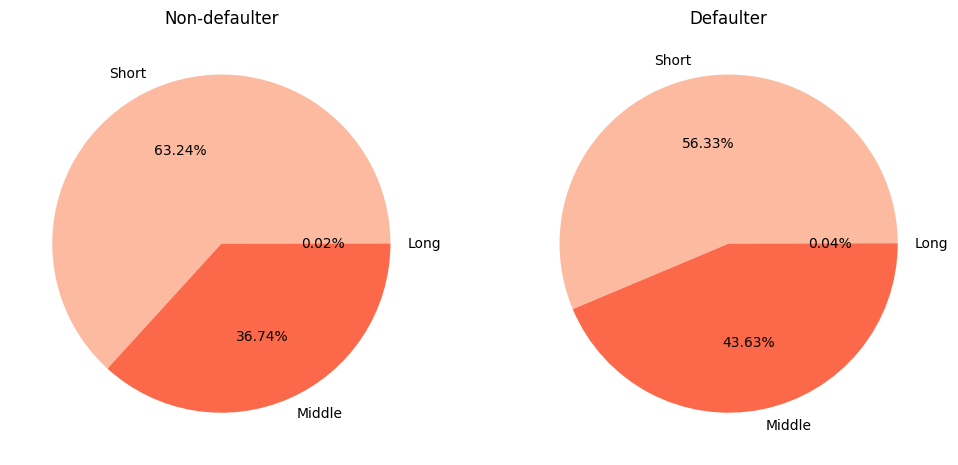

In [57]:
test.pie_plot("NEW_CNT_PAYMENT", df1=non_default, df2=default)

The characteristic regarding repayment time between the two groups is similar. For defaulters, the proportion of individuals with medium and long repayment terms is slightly higher.

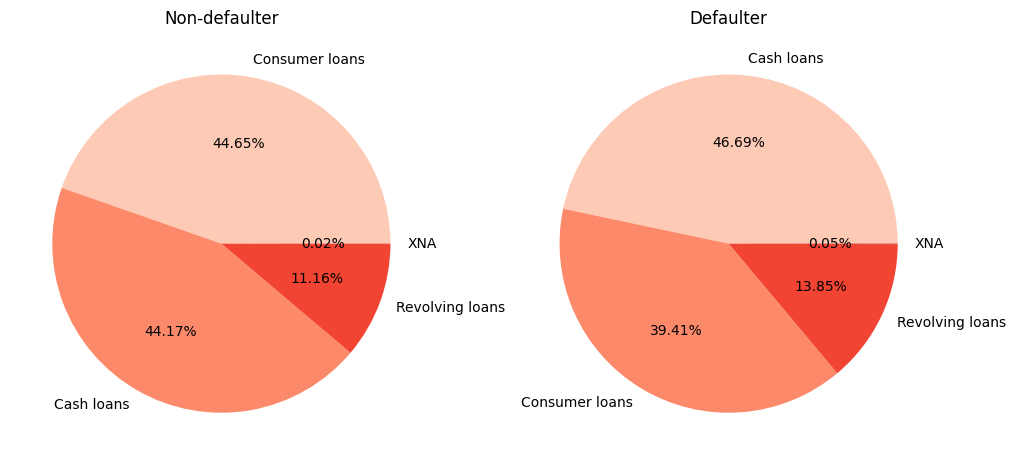

In [58]:
test.pie_plot("NAME_CONTRACT_TYPE", df1=non_default, df2=default)

The defaulting group tends to have Cash loans as the type of loan.

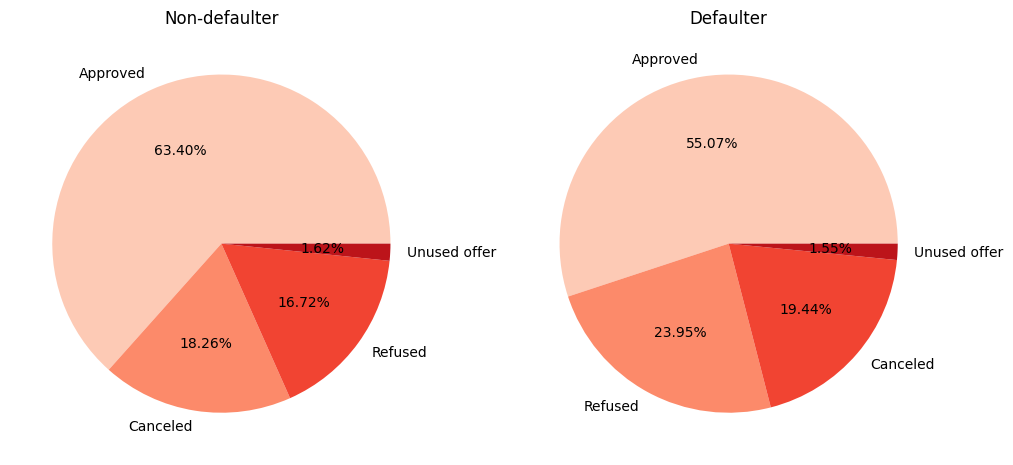

In [59]:
test.pie_plot("NAME_CONTRACT_STATUS", df1=non_default, df2=default)

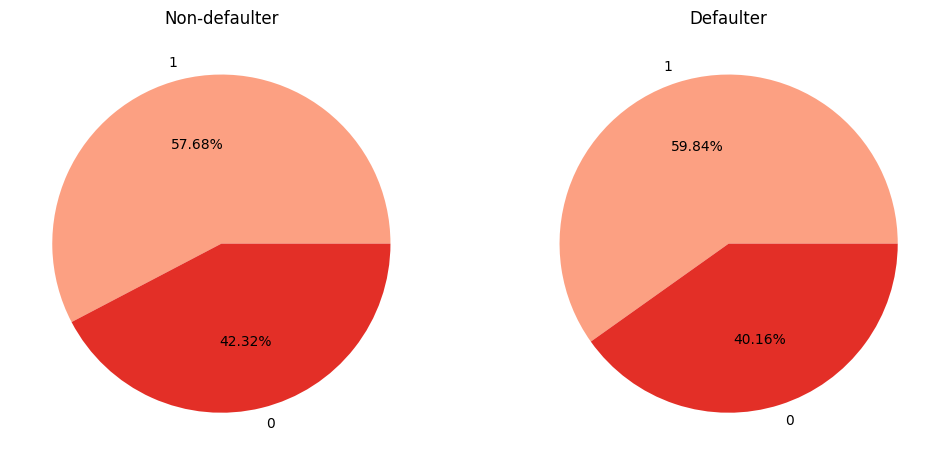

In [60]:
test.pie_plot("NEW_APP_CREDIT_RATE_RATIO", df1=non_default, df2=default)